In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
data = pd.read_csv("ToyotaCorolla - MLR.csv")
data.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [3]:
data = data.rename({"Age_08_04":"Age","cc":"CC"},axis=1)
data.drop(data.columns[[3,8]], axis=1, inplace=True)

In [4]:
data.describe()

Price          Age             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                CC        Doors        Gears      Weight  
count   1436.00000  1436.000000  1436.000000  1436.00000  
mean    1576.85585     4.033426     5.026462  1072.45961  
std      424.38677     0.952677     0.188510    52.64112  
min     1300.00000     2.000000     3.000000  1000.00000  
25%     1400.00000     3.000000     5.000000  1040.00000  
50%     1600.00000     4.000000     5.000000  1070.00000  
75%     1600.00000     5.000000     5.000000  1085.00000  
max    16000.00000     5.000000     6.000000  1615.00000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age        1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Automatic  1436 non-null   int64
 5   CC         1436 non-null   int64
 6   Doors      1436 non-null   int64
 7   Gears      1436 non-null   int64
 8   Weight     1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
data.duplicated().sum()

1

In [7]:
data[data.duplicated(keep=False)]

Price  Age     KM   HP  Automatic    CC  Doors  Gears  Weight
112  24950    8  13253  116          0  2000      5      5    1320
113  24950    8  13253  116          0  2000      5      5    1320

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.isna().sum()

Price        0
Age          0
KM           0
HP           0
Automatic    0
CC           0
Doors        0
Gears        0
Weight       0
dtype: int64

Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [10]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [11]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


# Exploratory Data Anlaysis
Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [12]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

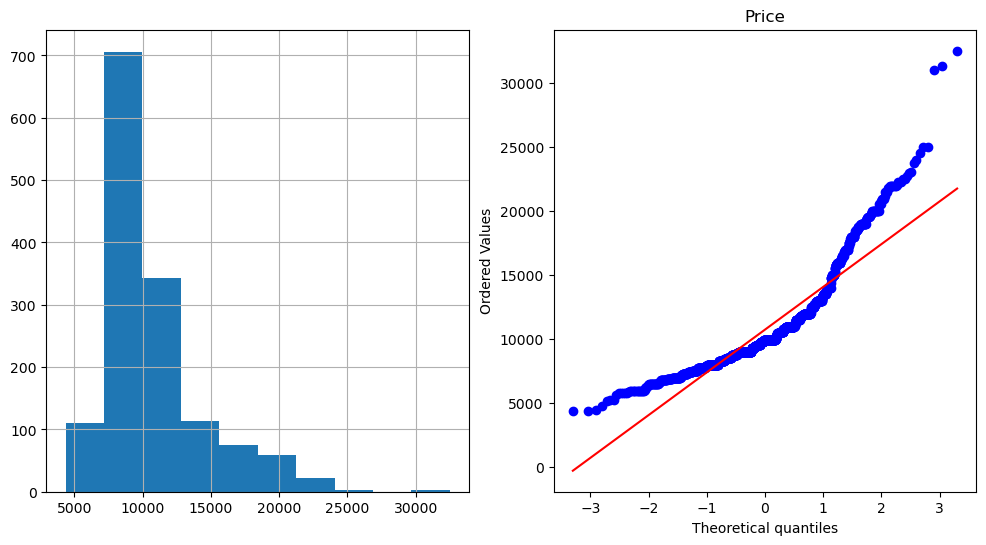

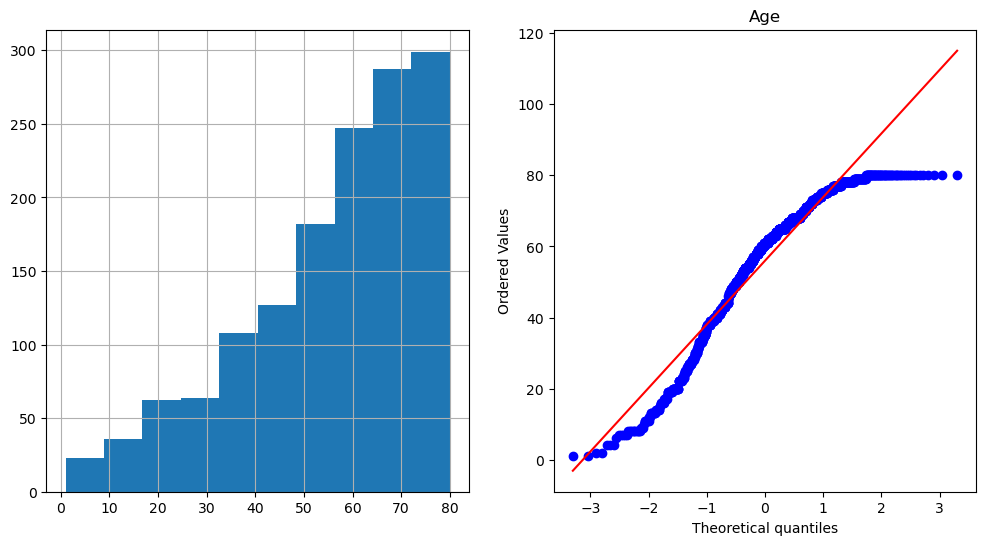

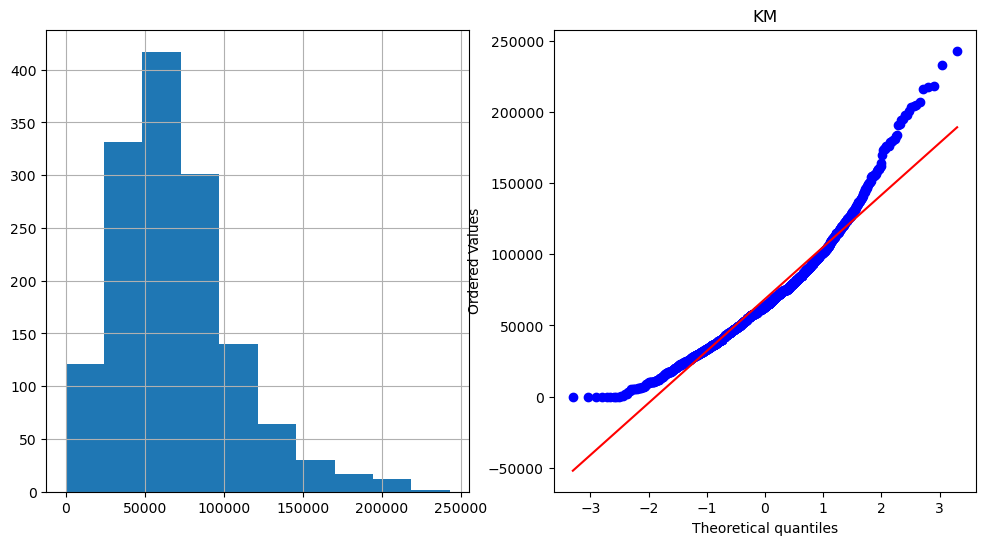

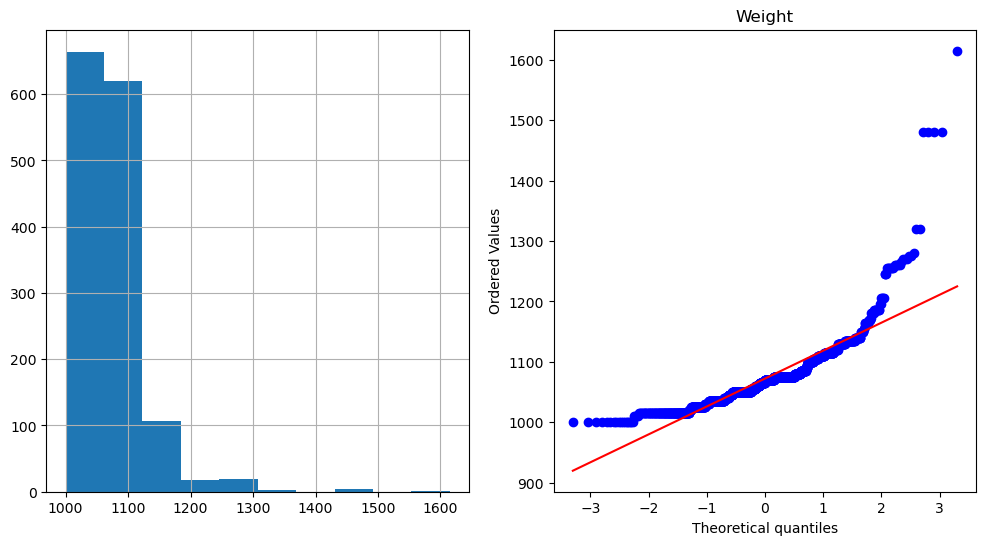

In [13]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

### Log transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

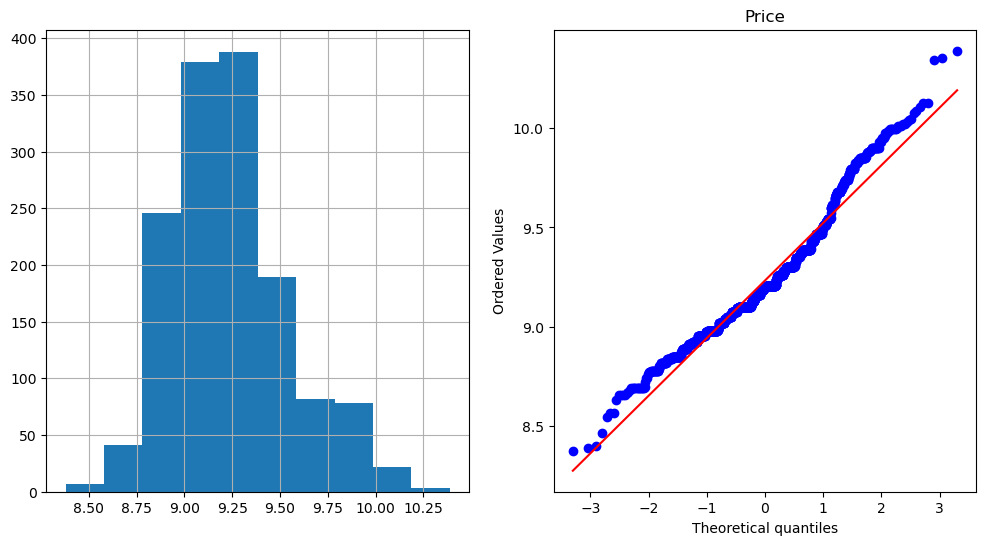

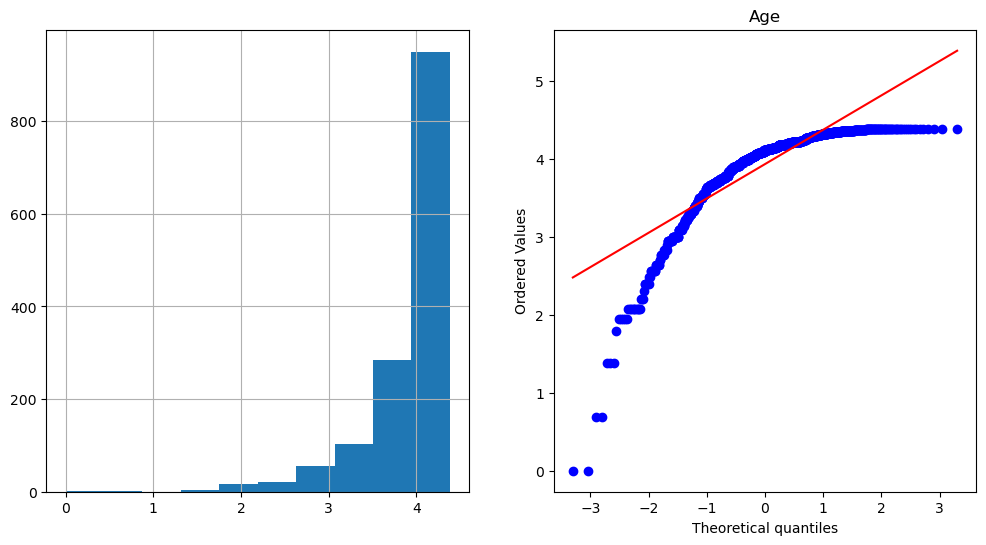

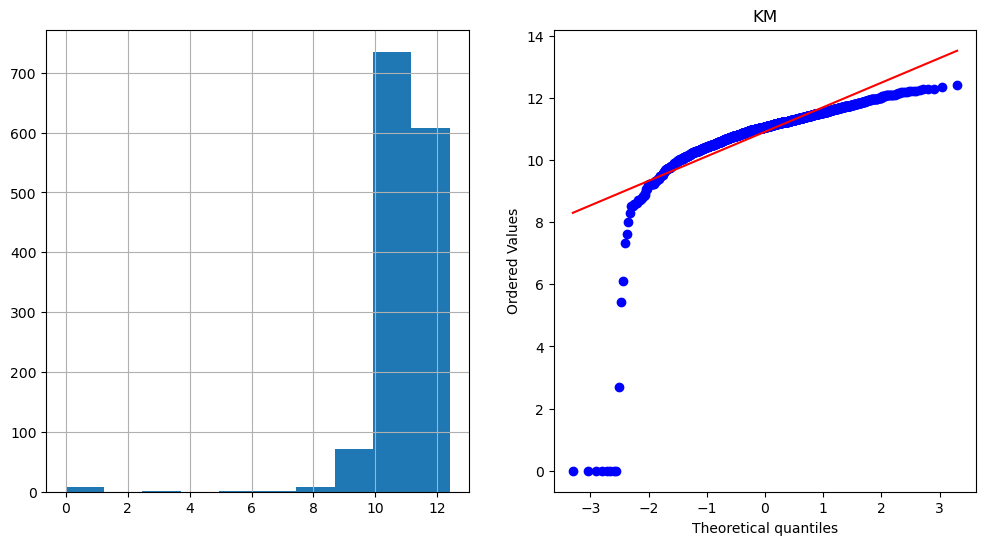

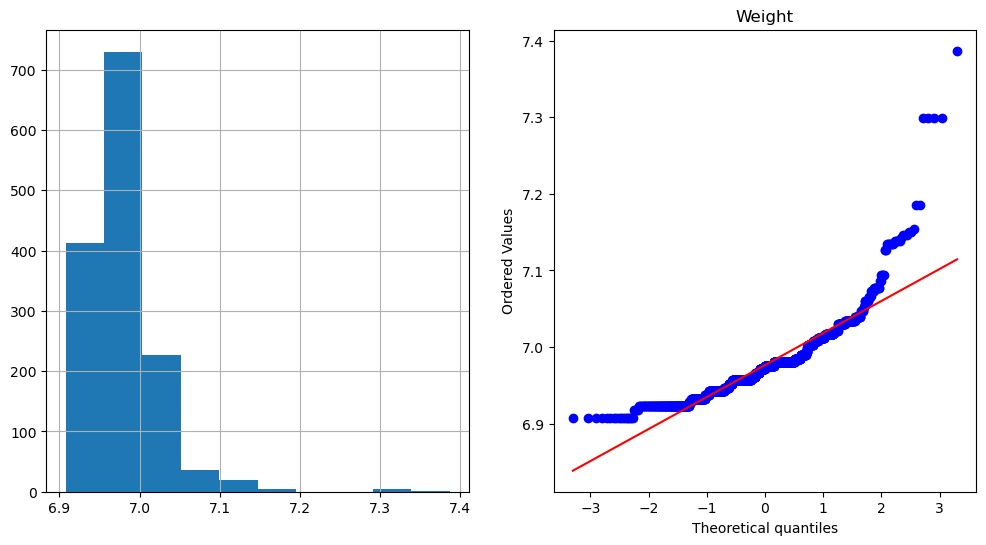

In [14]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### Square root transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

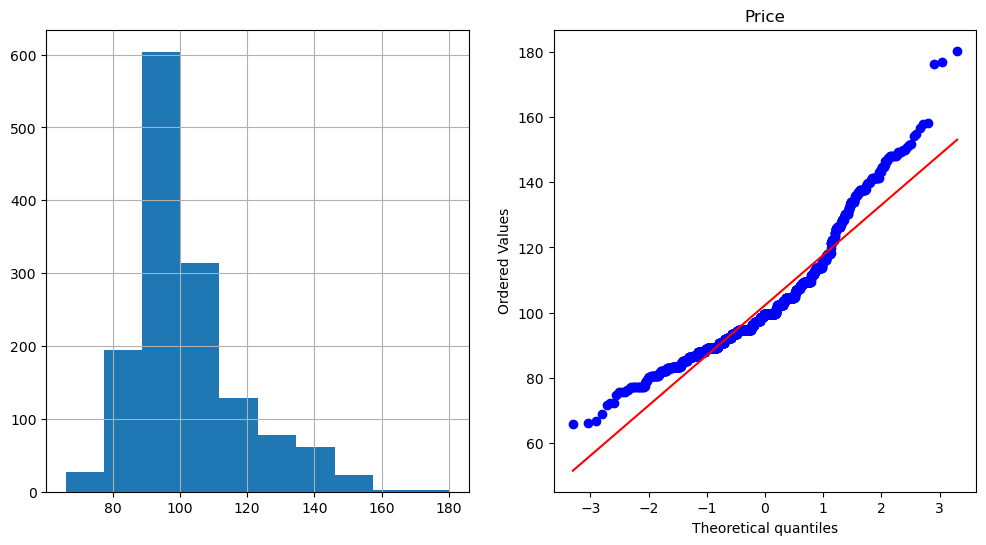

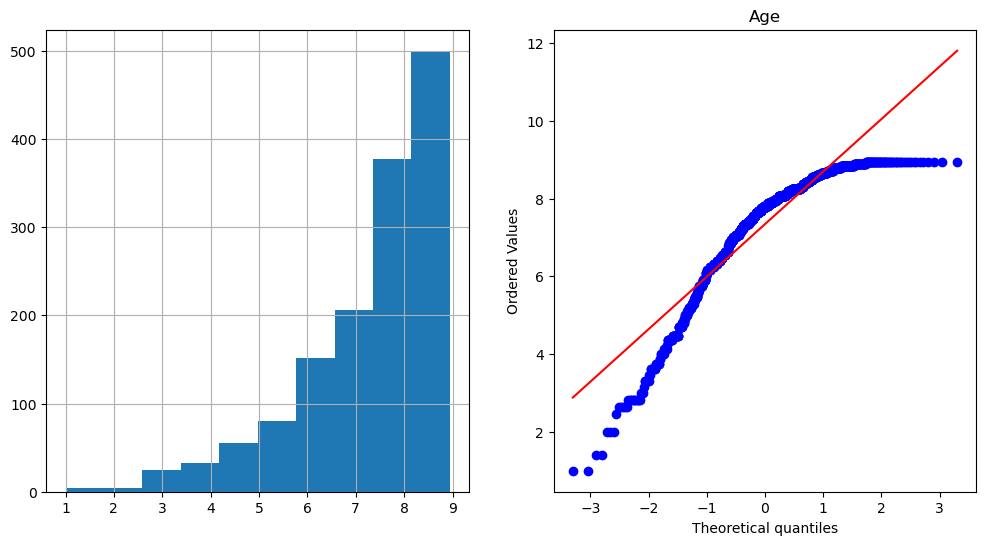

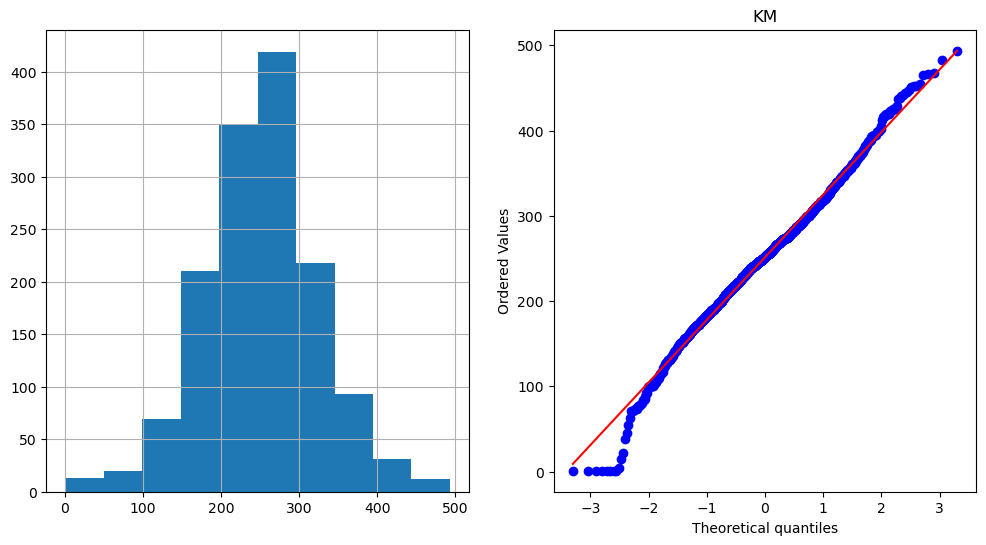

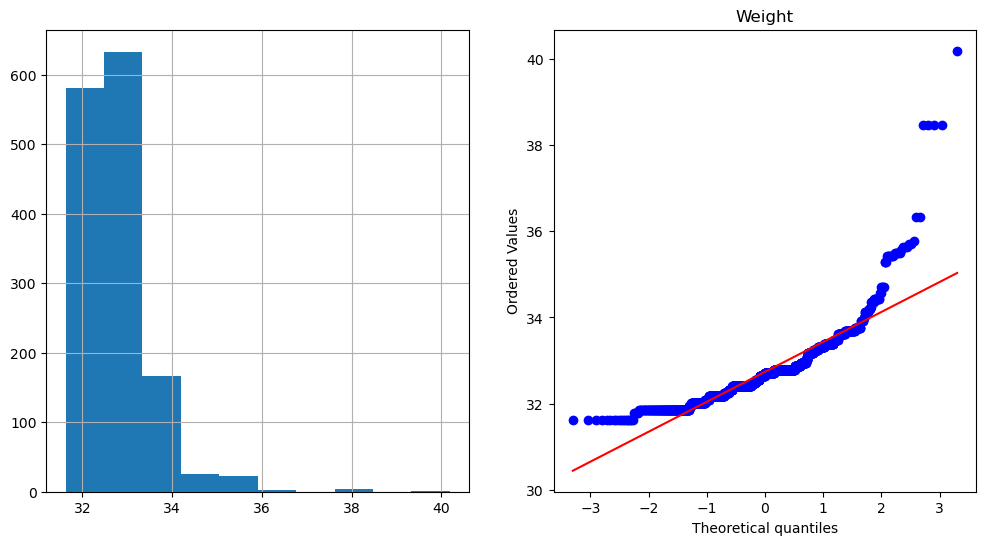

In [15]:
df=data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

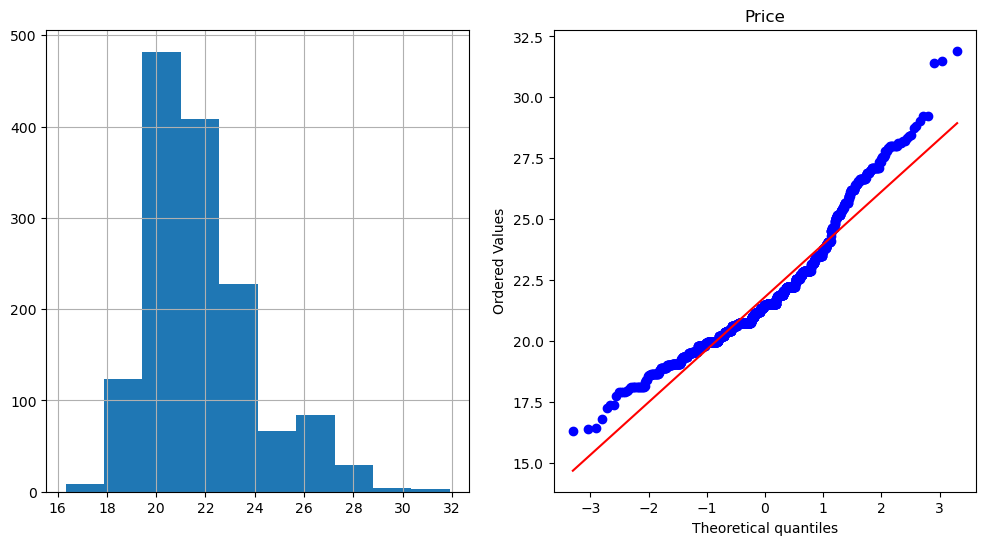

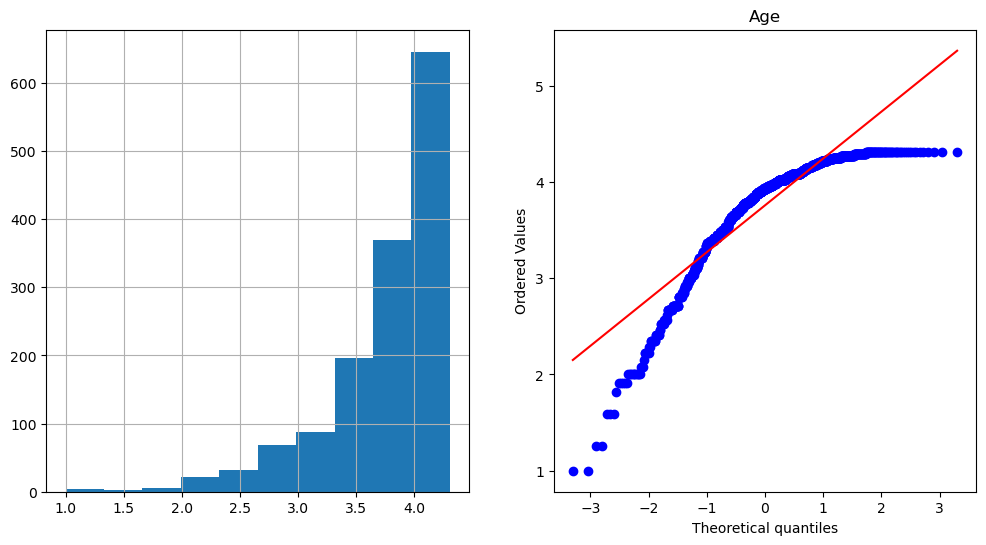

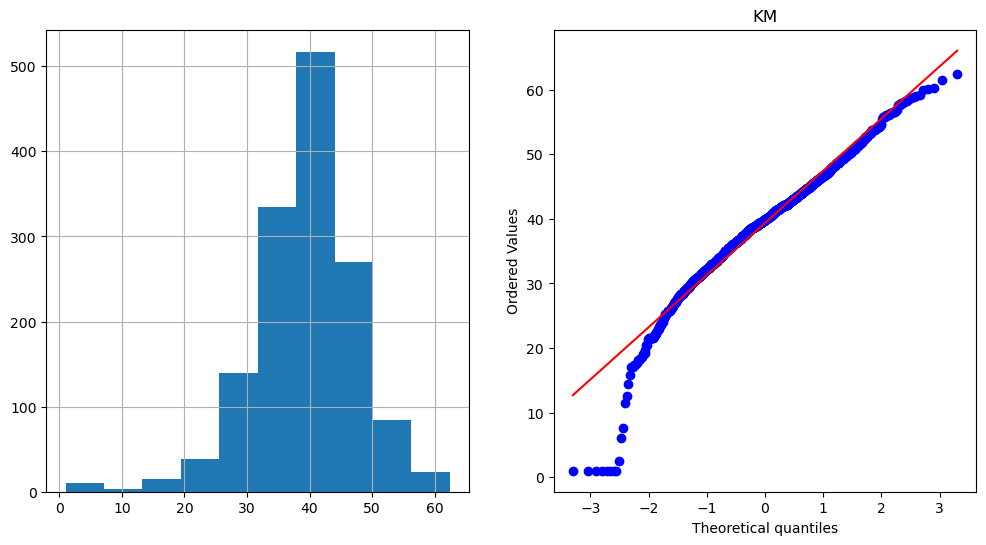

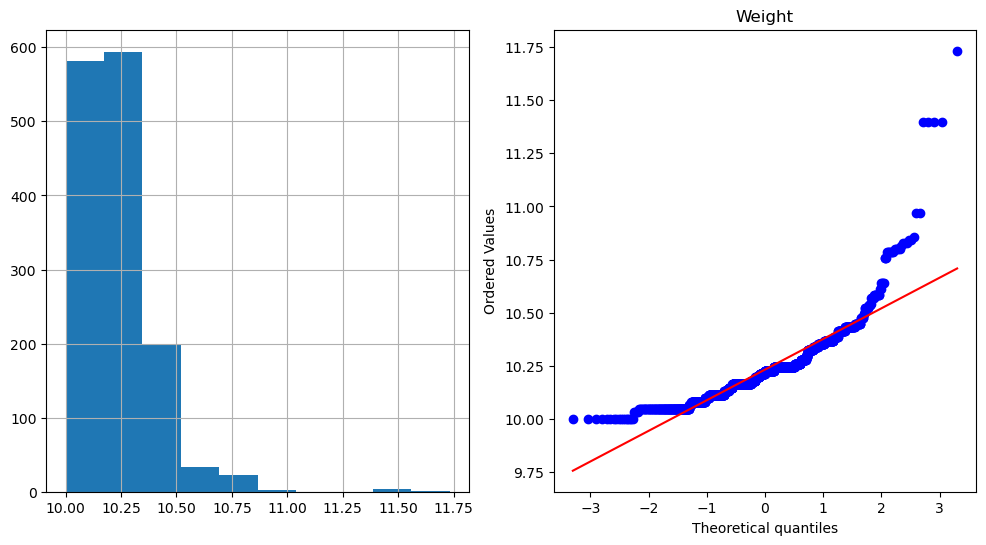

In [16]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

### The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

In [17]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Gears',
       'Weight'],
      dtype='object')

In [18]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age feature',shapiro(data.Age),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))

Price feature ShapiroResult(statistic=0.8534721682412996, pvalue=1.595778782735417e-34) 
Age feature ShapiroResult(statistic=0.926695692395398, pvalue=6.73996815062802e-26) 
Weight feature ShapiroResult(statistic=0.7825540643634167, pvalue=5.0427383782127665e-40) 
KM feature ShapiroResult(statistic=0.947581681921263, pvalue=3.4417651852891183e-22)


Observation: Since the p-values are less than .05, we reject the null hypothesis.
We have sufficient evidence to say that the sample data does not come from a normal distribution.

### Visualizing the Relation between each independent Feature with respect to the Dependent Feature

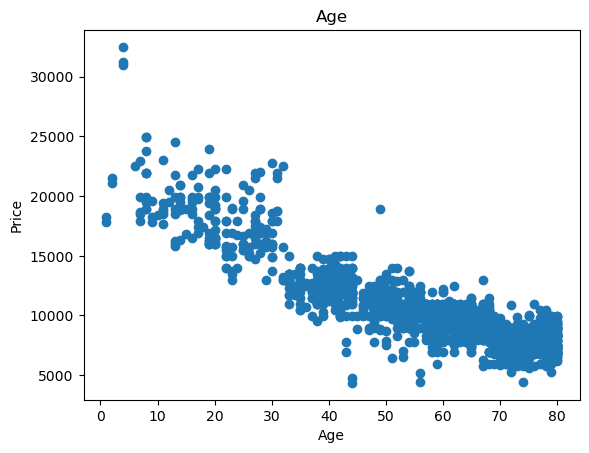

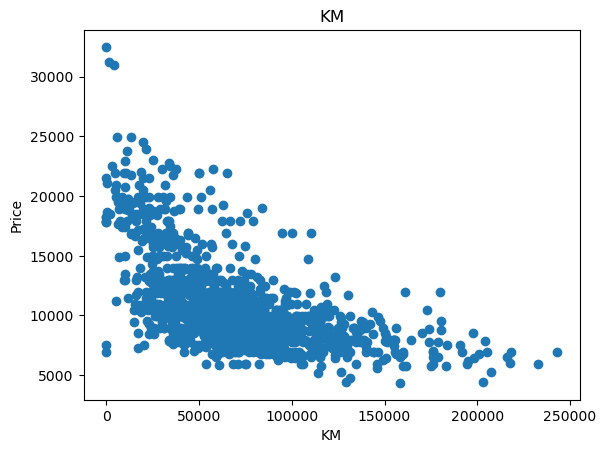

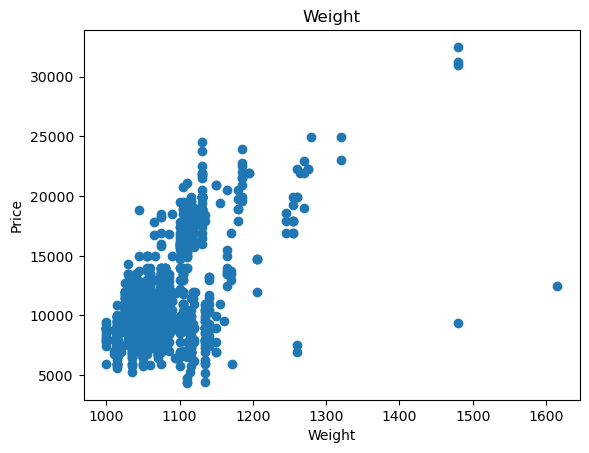

In [19]:
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features

# Lets analyze the relationship between the discrete variables and Price

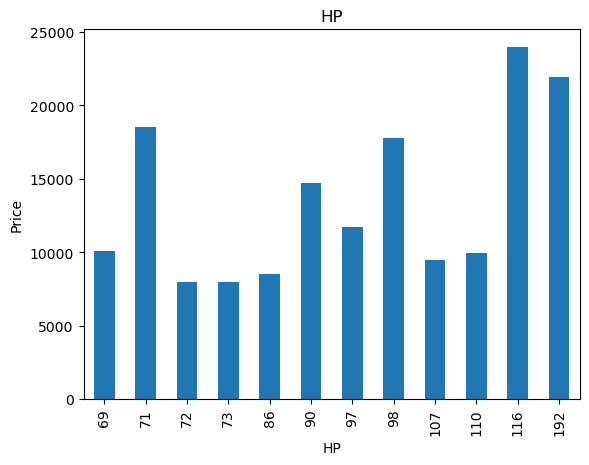

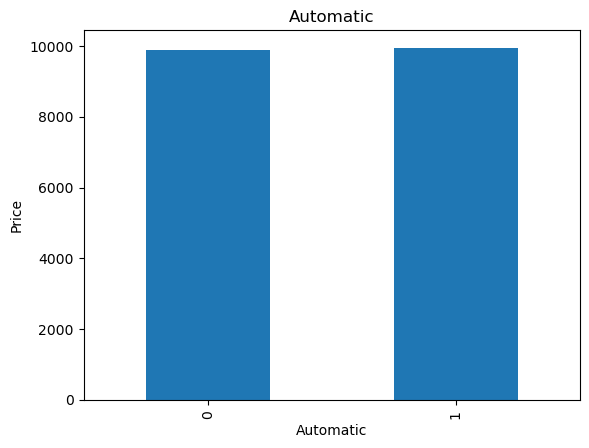

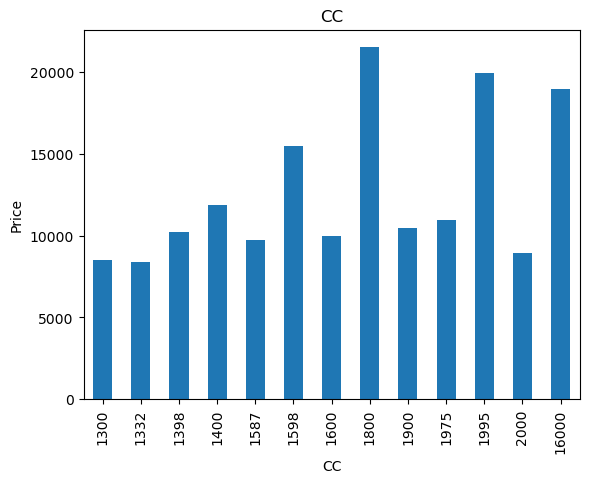

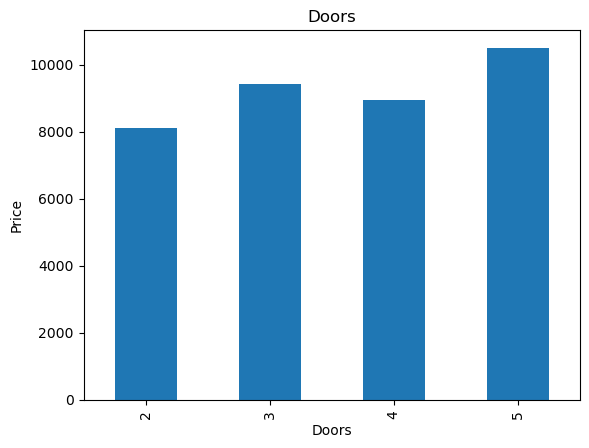

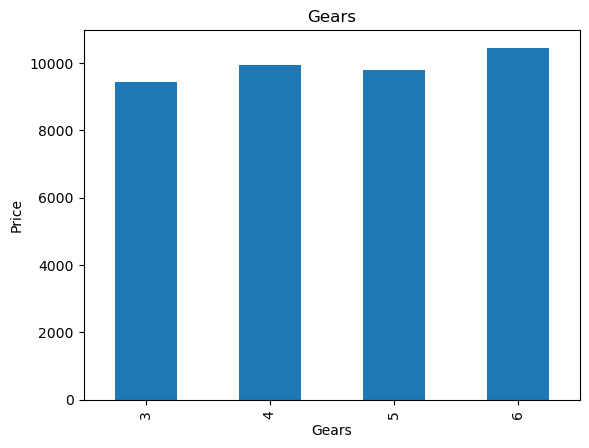

In [20]:
for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

# Visualizing Continuous Datatype for Outlier Detection

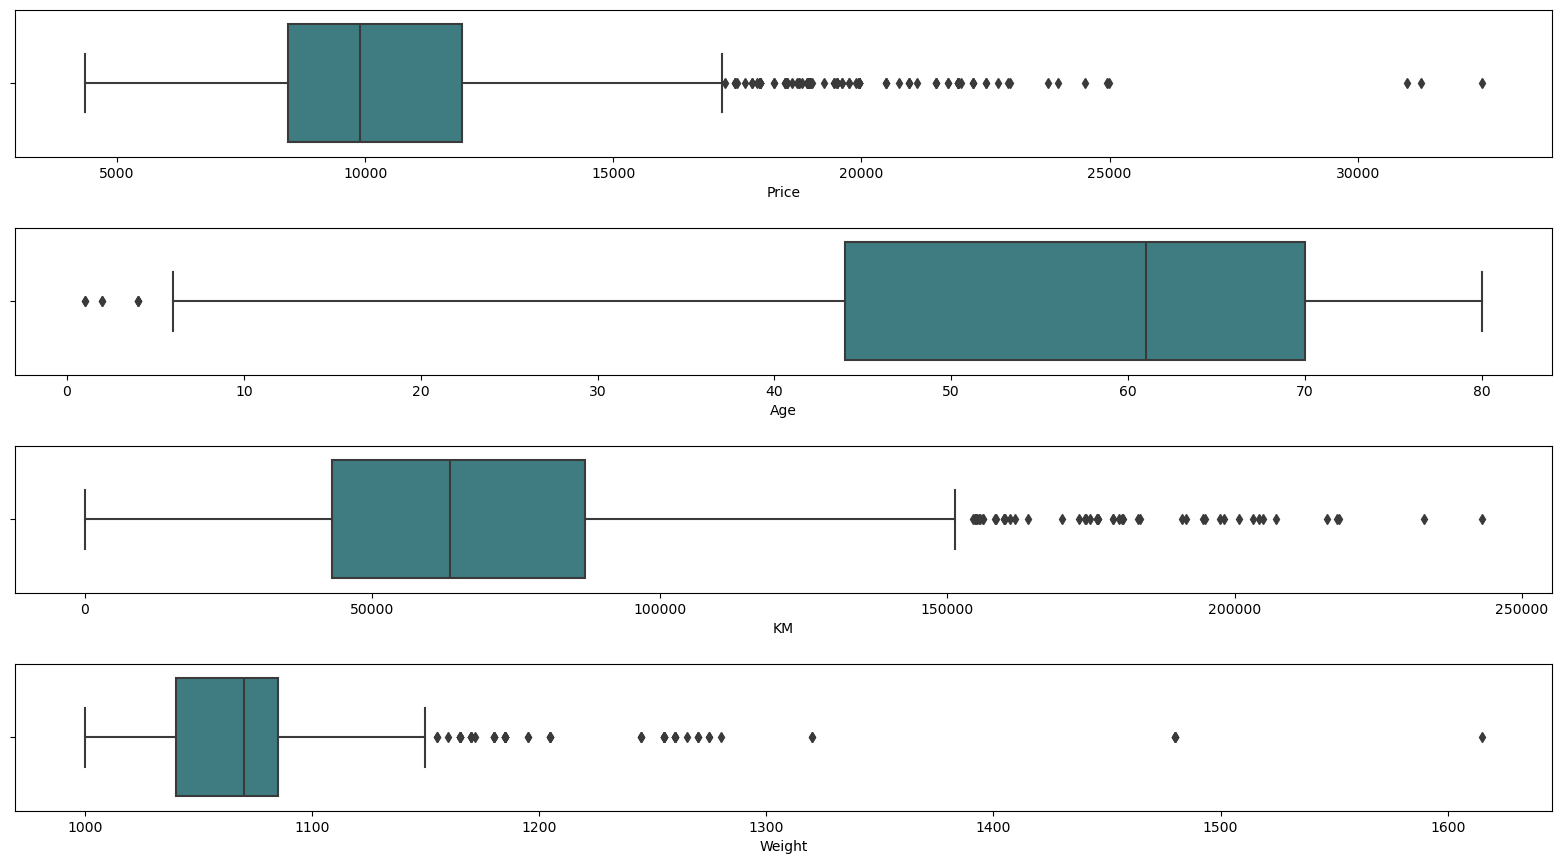

In [21]:
df=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### ^Observation: A significant amount of outliers are present in each continuous feature

### Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case
 Let's try Median Imputation to handle Outlier in Profit

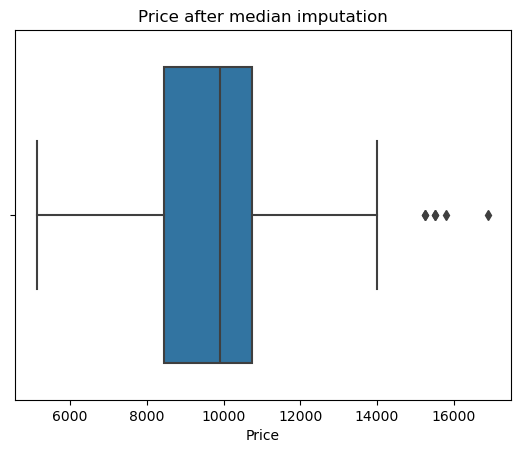

In [22]:
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(x=df1['Price'])
plt.title('Price after median imputation')
plt.show()

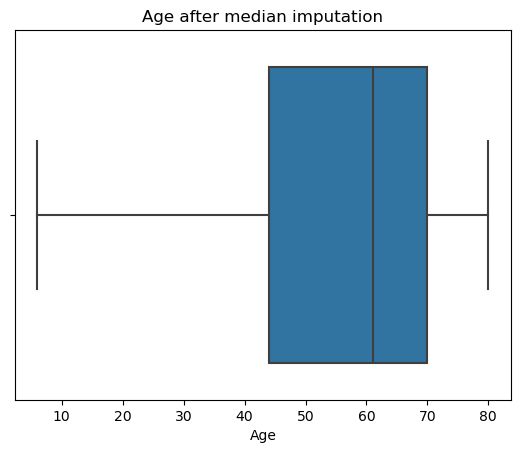

In [23]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(x=df1['Age'])
plt.title('Age after median imputation')
plt.show()

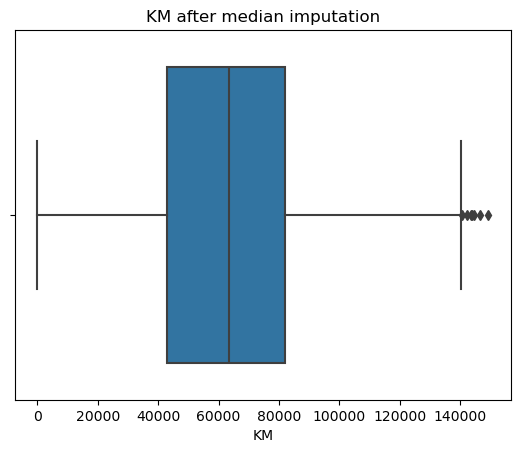

In [24]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(x=df1['KM'])
plt.title('KM after median imputation')
plt.show()

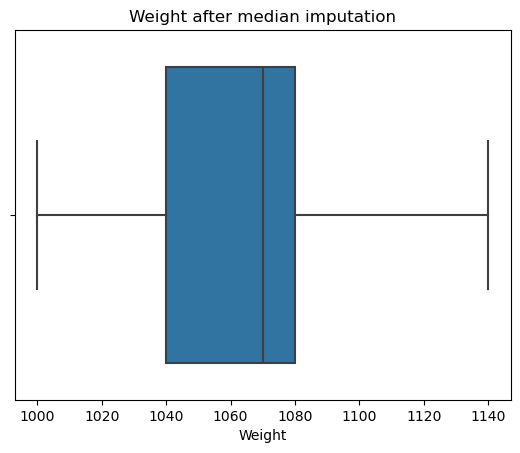

In [25]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(x=df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

#### Let's test our data in model and find the R-squared with median imputation data model

In [26]:
after_median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.3420499608564612, 0.3406706106695775)

### Let's try Mean Imputation to handle Outlier in Profit

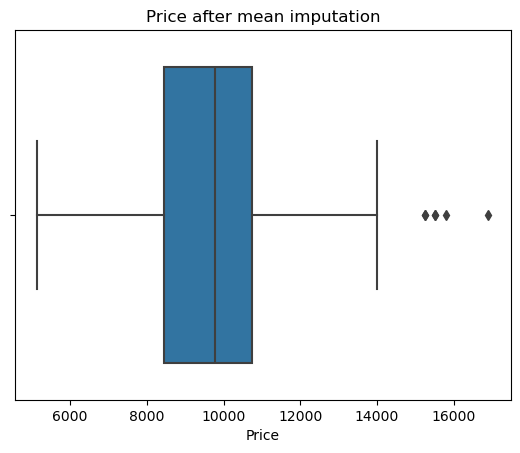

In [27]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(x=df2['Price'])
plt.title('Price after mean imputation')
plt.show()

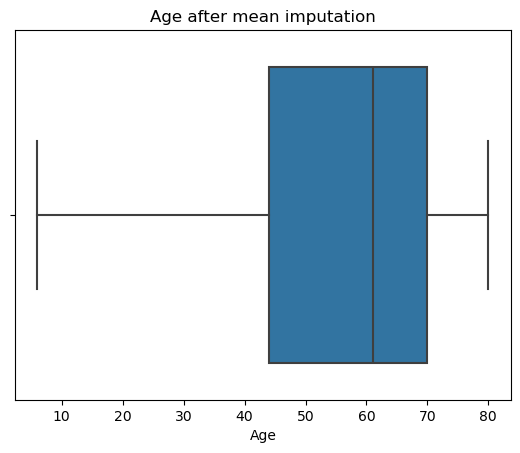

In [28]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(x=df2['Age'])
plt.title('Age after mean imputation')
plt.show()

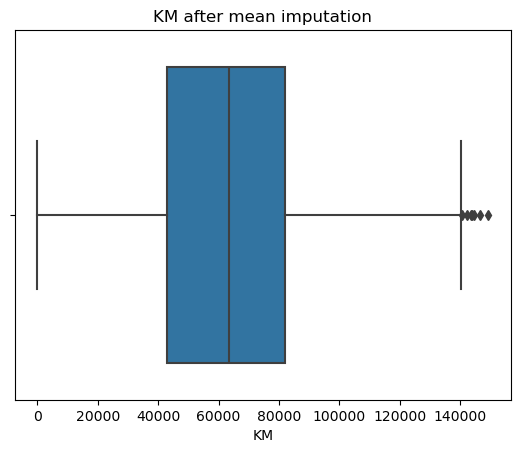

In [29]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(x=df2['KM'])
plt.title('KM after mean imputation')
plt.show()

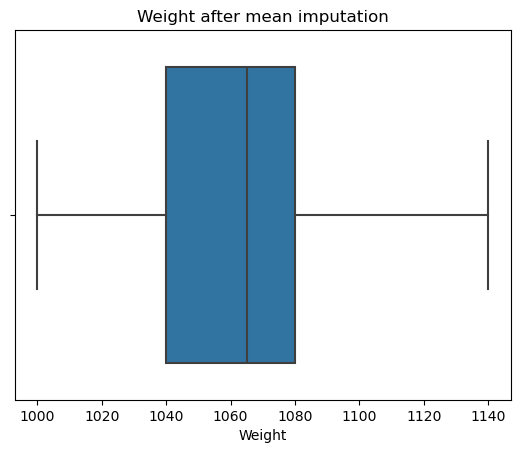

In [30]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(x=df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

Let's test our data in model and find the R-squared with mean imputation data model

In [31]:
after_mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

(0.3879621958171299, 0.3866790976951533)

### ^Observation: As you can see even after imputation the model is not performing well it getting worse

## Last option is to remove the outlier and see the results

In [32]:
df3=data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

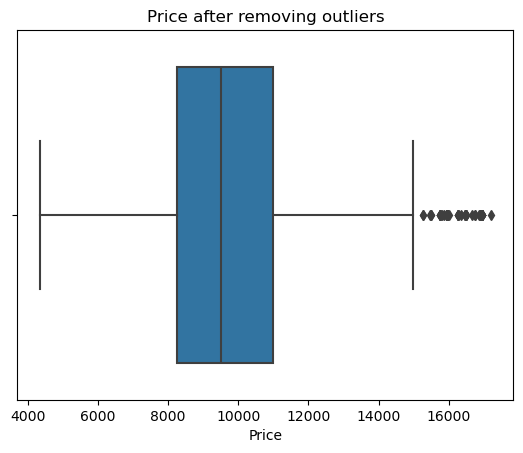

In [33]:
drop_outliers(df3, 'Price')
sns.boxplot(x=df3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

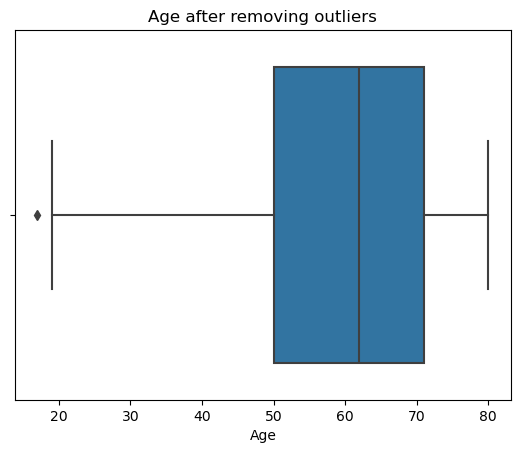

In [34]:
drop_outliers(df3, 'Age')
sns.boxplot(x=df3.Age)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

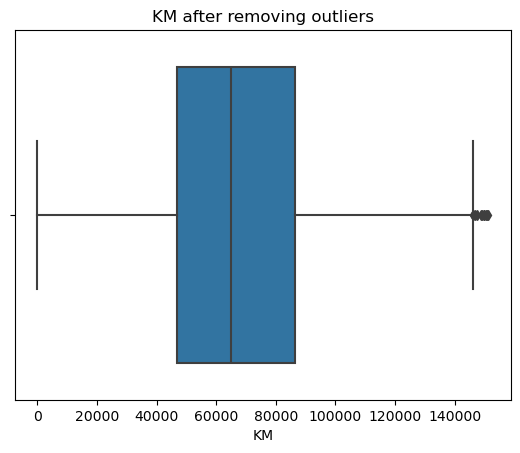

In [35]:
drop_outliers(df3, 'KM')
sns.boxplot(x=df3.KM)
plt.title('KM after removing outliers')

Text(0.5, 1.0, 'Weight after removing outliers')

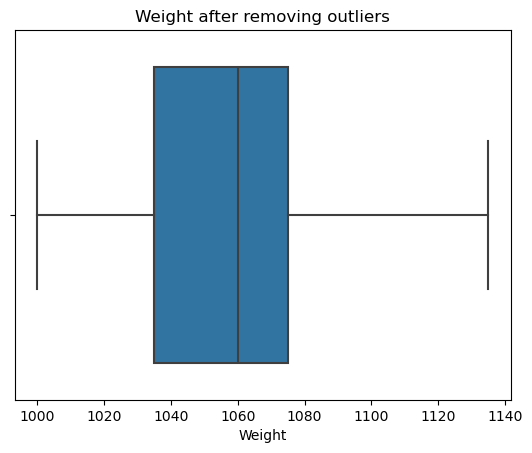

In [36]:
drop_outliers(df3, 'Weight')
sns.boxplot(x=df3.Weight)
plt.title('Weight after removing outliers')

### Let's test our data in model and compare the R-squared with without imputation data model

In [37]:
removed_outlier_model = smf.ols("Price~Age+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.7776886294411589, 0.7771455234870249)

In [38]:
np.sqrt(removed_outlier_model.mse_resid)

1060.0301342603996

#### Let's try log transformation and visualize the result first

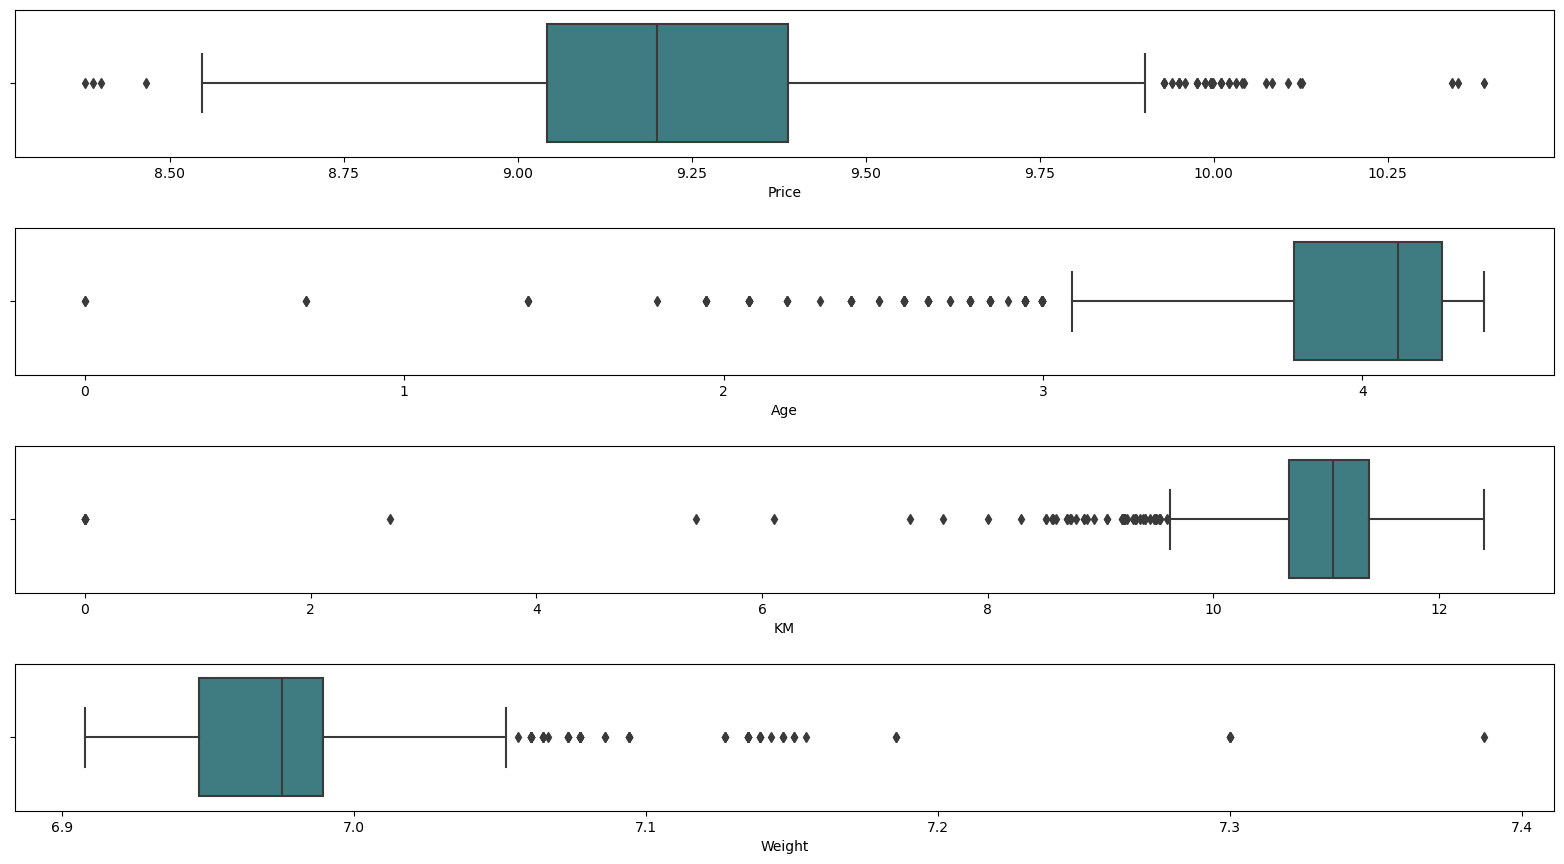

In [39]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])
    
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [40]:
log_transfomed = data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj

(0.7069873404282618, 0.70637305812308)

#### ^Observation: The outliers are still present

#### Let's try cuberoot transformation and visualize the result first

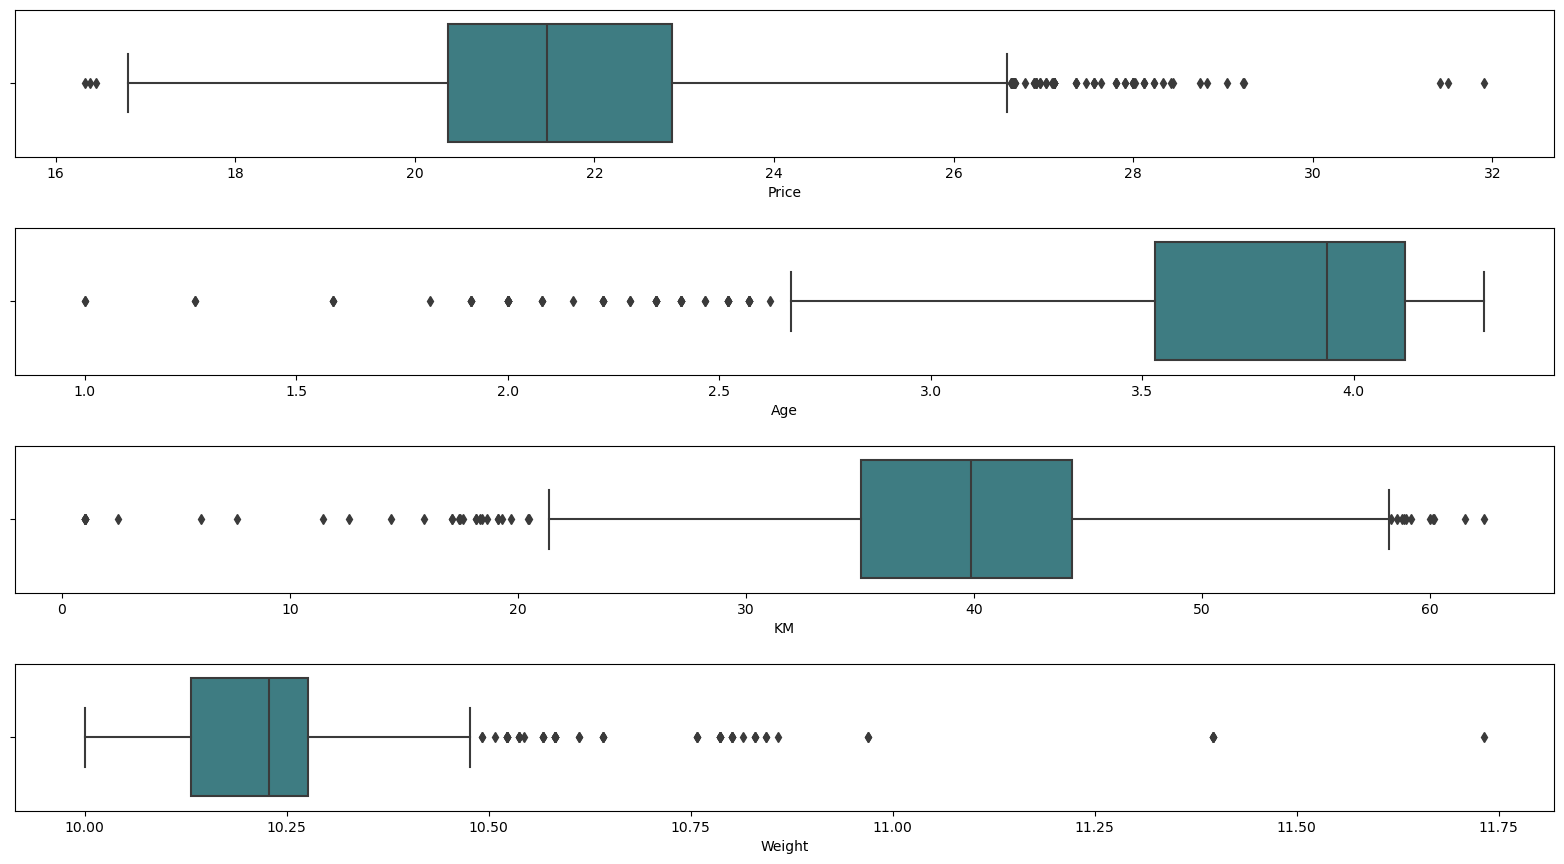

In [41]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])
    
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [42]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price~Age+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj 

(0.8146046800585908, 0.8142160106247514)

#### ^Observation: The outliers are still present
#### ^Observation: After removing Outliers the model performed very poorly than the raw data model

# Raw Data Model

In [43]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Gears',
       'Weight'],
      dtype='object')

In [44]:
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+Automatic+CC+Gears+Doors", data = data).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1116.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:35:53   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6978.8097   1318.782     -5.292      0.000   -9565.770   -4391.849
Age         -123.1434      2.635    -46.743      0.000    -128.311    -117.975
KM            -0.0194      0.001    -15.816      0.000      -0.022      -0.017
Weight        18.4560      0.874     21.107      0.000      16.741      20.171
HP            28.4736      2.612     10.901      0.000      23.350      33.598
Automatic    381.5559    158.204      2.412      0.016      71.219     691.893
CC            -0.0991      0.090     -1.106      0.269      -0.275       0.077
Gears        674.4324    198.102      3.404      0.001     285.829    1063.035
Doors         -3.0516     40.012     -0.076      0.939     -81.540      75.436
==============================================================================
Omnibus:                      193.764   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1545.518
Skew:                          -0.349   Prob(JB):                         0.00
Kurtosis:                       8.036   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
np.sqrt(raw_data_model.mse_resid)

1343.1400812481982

#### Detecting Influencers/Outliers in the Model

In [46]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

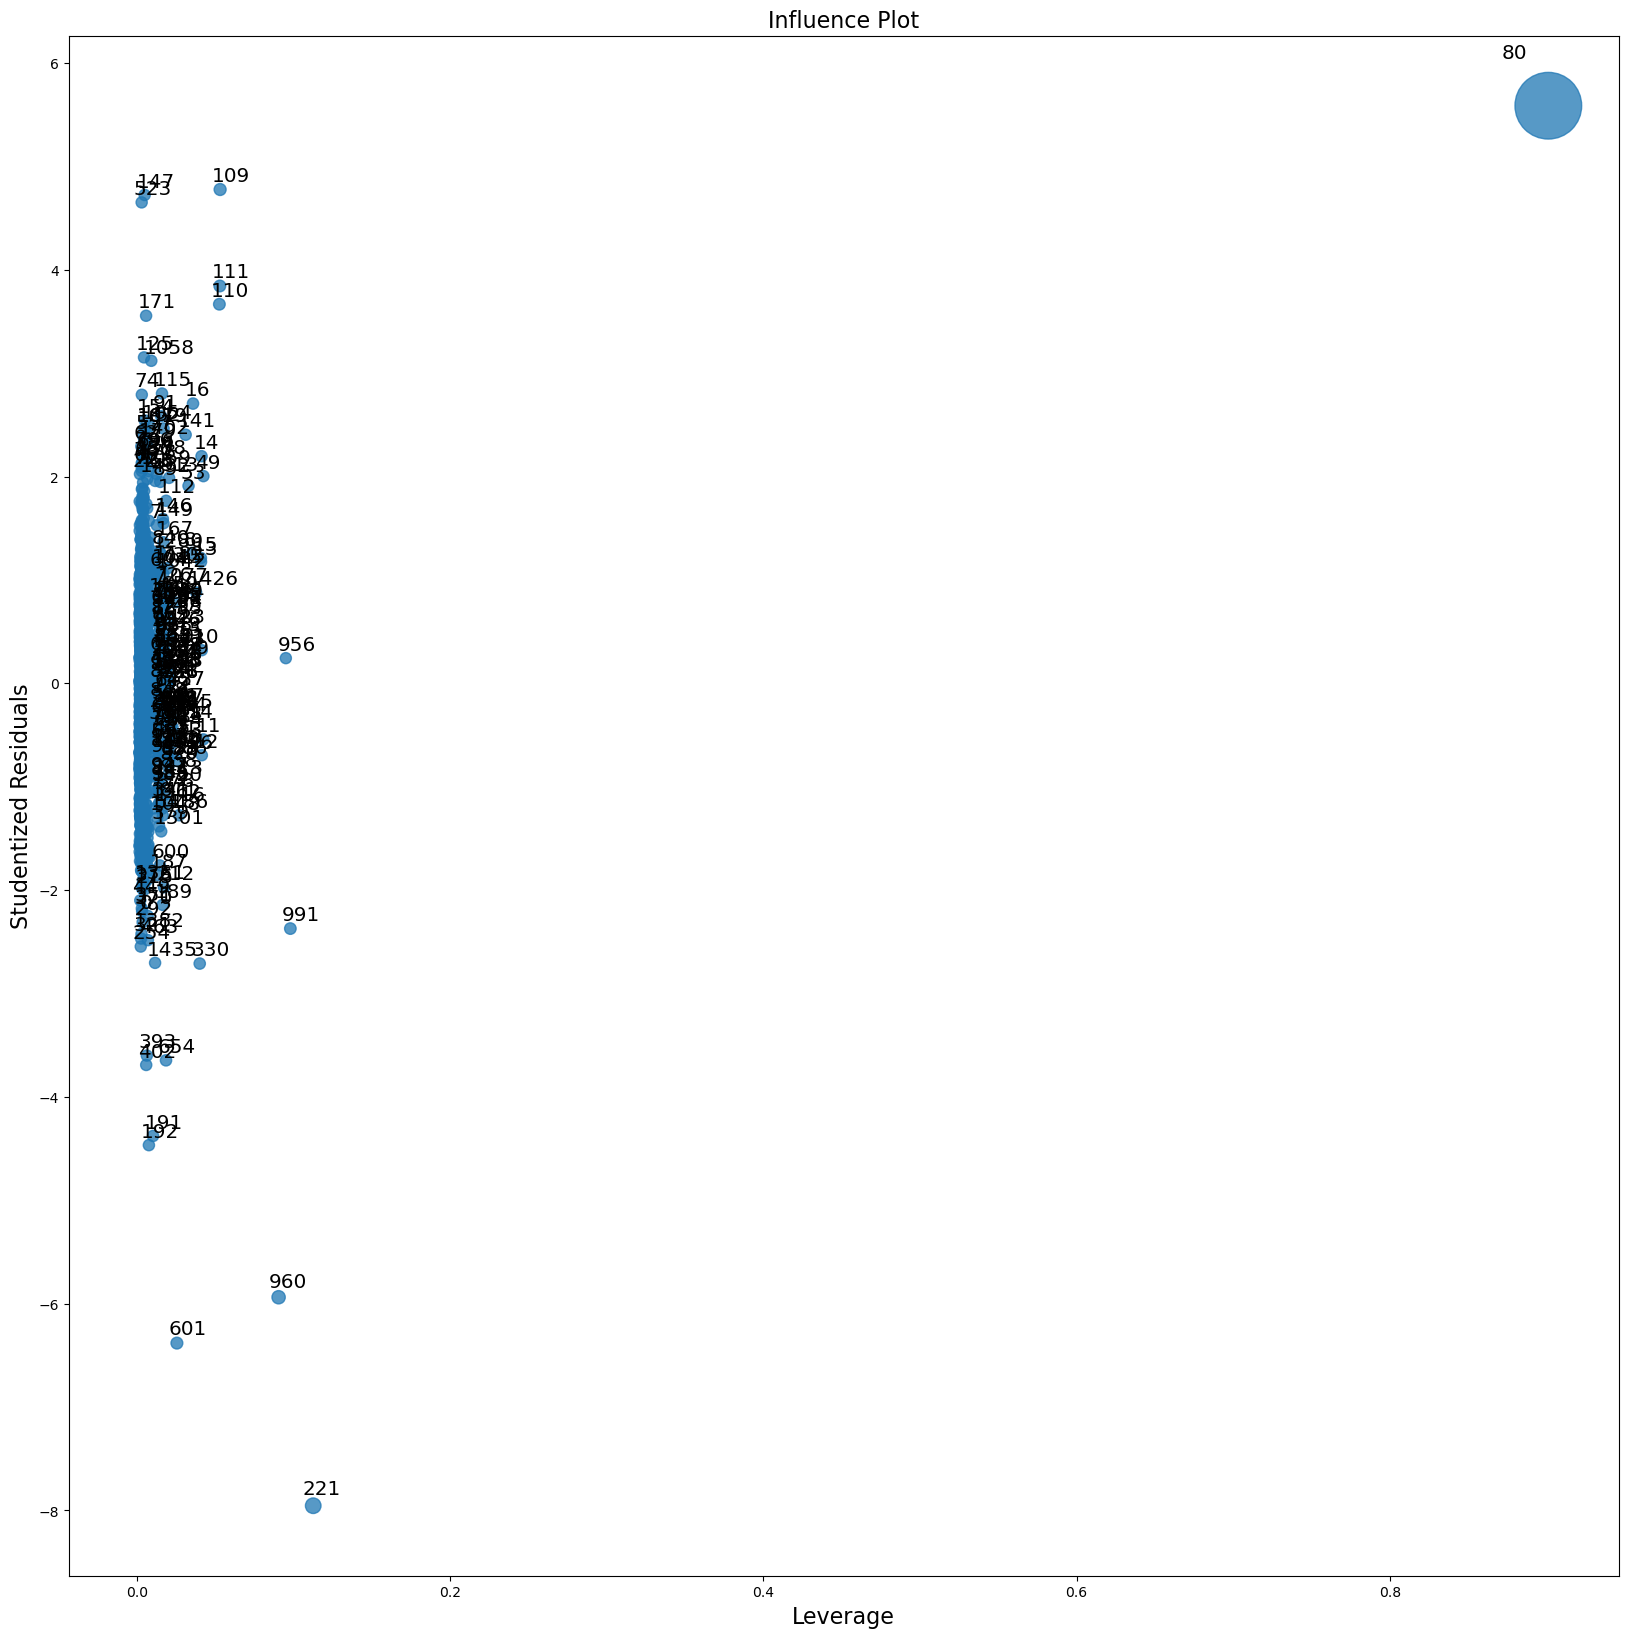

In [47]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

#### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [48]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


#### Let's plot the influencers and also plot a cut off line using the stem plot

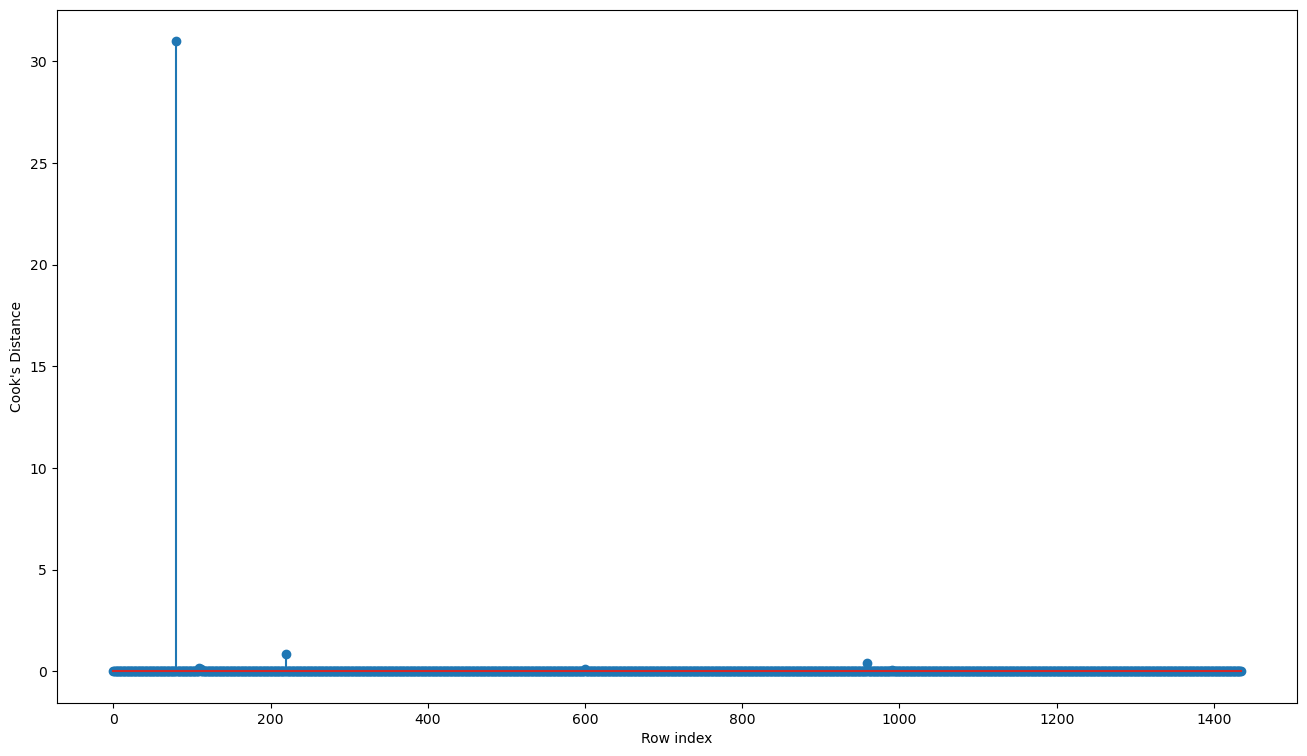

In [49]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [50]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 30.991213723922463)

In [51]:
data[data.index.isin([80])] 

Price  Age     KM   HP  Automatic     CC  Doors  Gears  Weight
80  18950   25  20019  110          1  16000      5      5    1180

### Let's improve the model by deleting the influence point and creating a new dataframe

In [52]:
dataframe= data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

Price  Age     KM  HP  Automatic    CC  Doors  Gears  Weight
0  13500   23  46986  90          0  2000      3      5    1165
1  13750   23  72937  90          0  2000      3      5    1165
2  13950   24  41711  90          0  2000      3      5    1165
3  14950   26  48000  90          0  2000      3      5    1165
4  13750   30  38500  90          0  2000      3      5    1170

In [53]:
data.shape

(1435, 9)

### Model Deletion Diagnostics and Final Model

In [54]:
# Another Method
"""k=dataframe.shape[1]
n=dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+Weight+HP+Automatic+CC+Gears+Doors',data=dataframe).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model=smf.ols('Price~Age+KM+Weight+HP+Automatic+CC+Gears+Doors',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)"""

'k=dataframe.shape[1]\nn=dataframe.shape[0]\nleverage_cutoff = (3*(k+1))/n\nwhile np.max(c)>leverage_cutoff:\n    model=smf.ols(\'Price~Age+KM+Weight+HP+Automatic+CC+Gears+Doors\',data=dataframe).fit()\n    (c,_)=model.get_influence().cooks_distance\n    c\n    np.argmax(c) , np.max(c)\n    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)\n    dataframe\nelse:\n    final_model=smf.ols(\'Price~Age+KM+Weight+HP+Automatic+CC+Gears+Doors\',data=dataframe).fit()\n    final_model.rsquared , final_model.aic\n    print("Thus model accuracy is improved to",final_model.rsquared)'

In [55]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age+KM+Weight+HP+Automatic+CC+Gears+Doors',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+Weight+HP+Automatic+CC+Gears+Doors',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8738131126841939
Thus model accuracy is improved to 0.882823451673957
Thus model accuracy is improved to 0.8877181547296764
Thus model accuracy is improved to 0.8884078648536775
Thus model accuracy is improved to 0.8907906982326644
Thus model accuracy is improved to 0.8881532636042674
Thus model accuracy is improved to 0.8895694600654983
Thus model accuracy is improved to 0.8890504756933634
Thus model accuracy is improved to 0.8893737644853391
Thus model accuracy is improved to 0.8887237441768024
Thus model accuracy is improved to 0.8881647892696043
Thus model accuracy is improved to 0.8876653014778908
Thus model accuracy is improved to 0.8892978254170044
Thus model accuracy is improved to 0.8902023138988819
Thus model accuracy is improved to 0.8906451600941402
Thus model accuracy is improved to 0.8917176913202308
Thus model accuracy is improved to 0.8911805273147786
Thus model accuracy is improved to 0.888518166768322
Thus model accuracy is improve

In [56]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [57]:
dataframe.shape

(1327, 9)

In [58]:
dataframe.head()

Price  Age     KM   HP  Automatic    CC  Doors  Gears  Weight
0  14950   26  48000   90          0  2000      3      5    1165
1  16900   27  94612   90          0  2000      3      5    1245
2  18600   30  75889   90          0  2000      3      5    1245
3  12950   23  71138   69          0  1900      3      5    1105
4  19950   22  43610  192          0  1800      3      6    1185

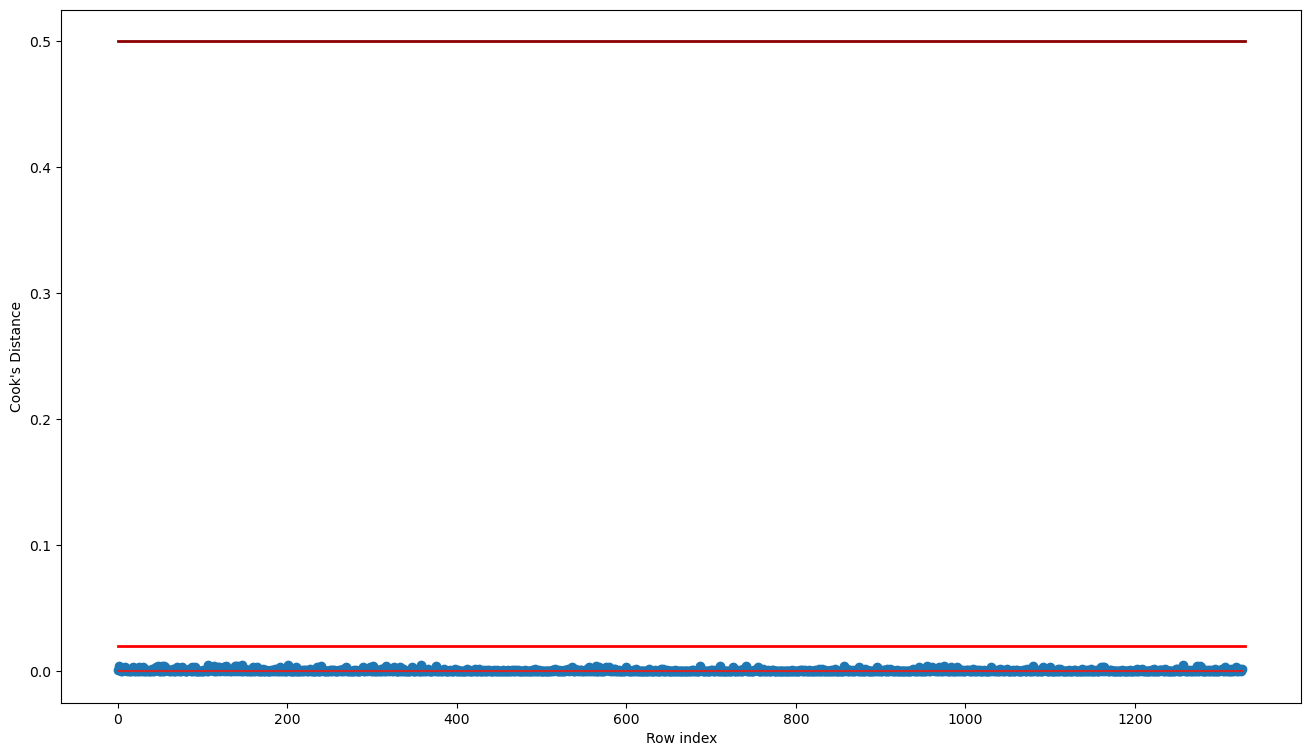

In [59]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

### ^Observation: All the points are below our cut-off line
Hence, we can say that there are no influncers present in our model we can proceed with the predictions.

In [60]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1490.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:35:58   Log-Likelihood:                -11012.
No. Observations:                1327   AIC:                         2.204e+04
Df Residuals:                    1318   BIC:                         2.209e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.254e+04   1389.204     -9.026      0.000   -1.53e+04   -9813.065
Age         -111.2126      2.201    -50.526      0.000    -115.531    -106.895
KM            -0.0152      0.001    -14.467      0.000      -0.017      -0.013
Weight        30.8850      1.306     23.654      0.000      28.324      33.446
HP            20.3194      2.370      8.573      0.000      15.670      24.969
Automatic     32.2181    130.779      0.246      0.805    -224.339     288.776
CC            -2.8349      0.263    -10.792      0.000      -3.350      -2.320
Gears         78.2911    179.180      0.437      0.662    -273.217     429.800
Doors       -145.0985     32.768     -4.428      0.000    -209.382     -80.815
==============================================================================
Omnibus:                        5.484   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.404
Skew:                           0.154   Prob(JB):                       0.0671
Kurtosis:                       3.054   Cond. No.                     3.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
np.sqrt(final_model.mse_resid)

975.5724388445211

## Feature Engineering
### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores
#### Log-Transformation

In [147]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['Gears'] = np.log(dataframe.Gears)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled['Automatic'] = dataframe['Automatic']
df_log_scaled.head()

Age     Price         KM    Weight     Gears    CC  Doors   HP  \
0  3.258097  9.612467  10.778956  7.060476  1.609438  2000      3   90   
1  3.295837  9.735069  11.457540  7.126891  1.609438  2000      3   90   
2  3.401197  9.830917  11.237027  7.126891  1.609438  2000      3   90   
3  3.135494  9.468851  11.172377  7.007601  1.609438  1900      3   69   
4  3.091042  9.900984  10.683042  7.077498  1.791759  1800      3  192   

   Automatic  
0          0  
1          0  
2          0  
3          0  
4          0

In [148]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Gears+Doors+Weight+Automatic", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     521.2
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:52:32   Log-Likelihood:                 821.14
No. Observations:                1327   AIC:                            -1624.
Df Residuals:                    1318   BIC:                            -1578.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1236      1.411     -2.923      0.004      -6.891      -1.356
Age           -0.4172      0.014    -30.289      0.000      -0.444      -0.390
KM             0.0179      0.006      3.124      0.002       0.007       0.029
HP             0.0031      0.000     10.276      0.000       0.002       0.004
CC            -0.0002   3.51e-05     -6.877      0.000      -0.000      -0.000
Gears          0.1616      0.131      1.237      0.216      -0.095       0.418
Doors         -0.0004      0.004     -0.097      0.922      -0.009       0.008
Weight         2.0949      0.208     10.067      0.000       1.687       2.503
Automatic      0.0391      0.018      2.210      0.027       0.004       0.074
==============================================================================
Omnibus:                      309.766   Durbin-Watson:                   1.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1342.972
Skew:                          -1.043   Prob(JB):                    2.38e-292
Kurtosis:                       7.465   Cond. No.                     6.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Cube-Root Transformation

In [149]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled['Automatic'] = dataframe['Automatic']
df_cbrt_scaled.head()

Age      Price         KM     Weight    CC  Doors  Gears   HP  \
0  2.962496  24.634688  36.342412  10.522251  2000      3      5   90   
1  3.000000  25.662299  45.566822  10.757791  2000      3      5   90   
2  3.107233  26.495431  42.337604  10.757791  2000      3      5   90   
3  2.843867  23.483163  41.434988  10.338418  1900      3      5   69   
4  2.802039  27.121537  35.198868  10.582122  1800      3      6  192   

   Automatic  
0          0  
1          0  
2          0  
3          0  
4          0

In [150]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Gears+Doors+Weight+Automatic", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     969.1
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:52:42   Log-Likelihood:                -1512.2
No. Observations:                1327   AIC:                             3042.
Df Residuals:                    1318   BIC:                             3089.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.2289      3.375     -3.623      0.000     -18.850      -5.608
Age           -2.6392      0.071    -37.336      0.000      -2.778      -2.501
KM            -0.0399      0.004     -9.862      0.000      -0.048      -0.032
HP             0.0150      0.002      8.378      0.000       0.012       0.019
CC            -0.0011      0.000     -5.194      0.000      -0.001      -0.001
Gears          0.2884      0.140      2.067      0.039       0.015       0.562
Doors         -0.0076      0.026     -0.296      0.768      -0.058       0.043
Weight         4.3297      0.344     12.590      0.000       3.655       5.004
Automatic      0.2306      0.103      2.249      0.025       0.029       0.432
==============================================================================
Omnibus:                      148.245   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.754
Skew:                          -0.591   Prob(JB):                     1.05e-89
Kurtosis:                       5.452   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Square-Root Transformation

In [144]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled['Automatic'] = dataframe['Automatic']
df_sqrt_scaled.head()

Age       Price          KM     Weight    CC  Doors  Gears   HP  \
0  5.099020  122.270193  219.089023  34.132096  2000      3      5   90   
1  5.196152  130.000000  307.590637  35.284558  2000      3      5   90   
2  5.477226  136.381817  275.479582  35.284558  2000      3      5   90   
3  4.795832  113.798067  266.717079  33.241540  1900      3      5   69   
4  4.690416  141.244469  208.830074  34.423829  1800      3      6  192   

   Automatic  
0          0  
1          0  
2          0  
3          0  
4          0

In [145]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Gears+Doors+Weight+Automatic", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1226.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:49:42   Log-Likelihood:                -3982.7
No. Observations:                1327   AIC:                             7983.
Df Residuals:                    1318   BIC:                             8030.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -62.6450     13.990     -4.478      0.000     -90.089     -35.201
Age           -6.9001      0.159    -43.470      0.000      -7.211      -6.589
KM            -0.0356      0.003    -12.686      0.000      -0.041      -0.030
HP             0.0949      0.012      8.152      0.000       0.072       0.118
CC            -0.0075      0.001     -5.627      0.000      -0.010      -0.005
Gears          1.8598      0.898      2.072      0.039       0.099       3.621
Doors         -0.1390      0.166     -0.839      0.401      -0.464       0.186
Weight         6.6605      0.454     14.669      0.000       5.770       7.551
Automatic      1.4353      0.659      2.179      0.029       0.143       2.727
==============================================================================
Omnibus:                       24.734   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.812
Skew:                          -0.192   Prob(JB):                     1.67e-08
Kurtosis:                       3.708   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's try Robust transformation
The Robust Scaler, as the name suggests is not sensitive to outliers.

This scaler removes the median from the data
Scales the data by the InterQuartile Range(IQR)
The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

In [68]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

Price       Age        KM   HP  Automatic    CC  Doors  Gears    Weight
0  1.545455 -1.458333 -0.375306   90          0  2000      3      5  2.222222
1  2.136364 -1.416667  0.727010   90          0  2000      3      5  4.000000
2  2.651515 -1.291667  0.284235   90          0  2000      3      5  4.000000
3  0.939394 -1.583333  0.171879   69          0  1900      3      5  0.888889
4  3.060606 -1.625000 -0.479124  192          0  1800      3      6  2.666667

In [69]:
robust_transformed_model = smf.ols("Price~Age+KM+HP+CC+Gears+Doors+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1704.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:35:59   Log-Likelihood:                -261.29
No. Observations:                1327   AIC:                             538.6
Df Residuals:                    1319   BIC:                             580.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8475      0.303      2.794      0.005       0.252       1.443
Age           -0.8079      0.016    -51.798      0.000      -0.839      -0.777
KM            -0.1950      0.013    -14.545      0.000      -0.221      -0.169
HP             0.0062      0.001      8.601      0.000       0.005       0.008
CC            -0.0009   7.76e-05    -11.123      0.000      -0.001      -0.001
Gears          0.0225      0.054      0.416      0.677      -0.084       0.129
Doors         -0.0444      0.010     -4.537      0.000      -0.064      -0.025
Weight         0.4224      0.017     24.752      0.000       0.389       0.456
==============================================================================
Omnibus:                        5.352   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.272
Skew:                           0.152   Prob(JB):                       0.0716
Kurtosis:                       3.052   Cond. No.                     5.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Applying Standard Scaler
For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
x_scaled = x – mean/std_dev
However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [70]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

Price       Age        KM        HP  Automatic        CC     Doors  \
0  1.447122 -1.738537 -0.576057 -0.900059  -0.226948  2.544908 -1.073349   
1  2.079907 -1.682414  0.762833 -0.900059  -0.226948  2.544908 -1.073349   
2  2.631566 -1.514046  0.225031 -0.900059  -0.226948  2.544908 -1.073349   
3  0.798111 -1.906905  0.088562 -2.553231  -0.226948  1.976023 -1.073349   
4  3.069648 -1.963028 -0.702156  7.129637  -0.226948  1.407137 -1.073349   

      Gears    Weight  
0 -0.149792  2.428821  
1 -0.149792  4.395022  
2 -0.149792  4.395022  
3 -0.149792  0.954170  
4  6.262258  2.920371

In [71]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Gears+Doors+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1704.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:35:59   Log-Likelihood:                -352.15
No. Observations:                1327   AIC:                             720.3
Df Residuals:                    1319   BIC:                             761.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.529e-15      0.009  -2.91e-13      1.000      -0.017       0.017
Age           -0.6423      0.012    -51.798      0.000      -0.667      -0.618
KM            -0.1719      0.012    -14.545      0.000      -0.195      -0.149
HP             0.0839      0.010      8.601      0.000       0.065       0.103
CC            -0.1625      0.015    -11.123      0.000      -0.191      -0.134
Gears          0.0038      0.009      0.416      0.677      -0.014       0.021
Doors         -0.0453      0.010     -4.537      0.000      -0.065      -0.026
Weight         0.4090      0.017     24.752      0.000       0.377       0.441
==============================================================================
Omnibus:                        5.352   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.272
Skew:                           0.152   Prob(JB):                       0.0716
Kurtosis:                       3.052   Cond. No.                         3.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ^Observation: After the transformation and building models the R-Squared had varince with respect to other transformations
But standard scaler is better than raw data model and other models with better AIC, BIC log-likelihood scores

We have to perform model validation test to check which model is better will do at the end of this
## For building Multi Linear Resgression there are assumption regarding the data set.
### They are as follows:-
Feature should be independent of each other there should'nt be any dependency upon each other

There shouldn't any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)

Each Feature and Model Error (residuals) should be independent of each other

Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

There should be a linear relation between the dependent variable and Independent variables
#### We will Check the above one by one
### Preparing a Model

In [72]:
model = smf.ols("Price~Age+KM+HP+CC+Gears+Doors+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1704.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:35:59   Log-Likelihood:                -352.15
No. Observations:                1327   AIC:                             720.3
Df Residuals:                    1319   BIC:                             761.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.529e-15      0.009  -2.91e-13      1.000      -0.017       0.017
Age           -0.6423      0.012    -51.798      0.000      -0.667      -0.618
KM            -0.1719      0.012    -14.545      0.000      -0.195      -0.149
HP             0.0839      0.010      8.601      0.000       0.065       0.103
CC            -0.1625      0.015    -11.123      0.000      -0.191      -0.134
Gears          0.0038      0.009      0.416      0.677      -0.014       0.021
Doors         -0.0453      0.010     -4.537      0.000      -0.065      -0.026
Weight         0.4090      0.017     24.752      0.000       0.377       0.441
==============================================================================
Omnibus:                        5.352   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.272
Skew:                           0.152   Prob(JB):                       0.0716
Kurtosis:                       3.052   Cond. No.                         3.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

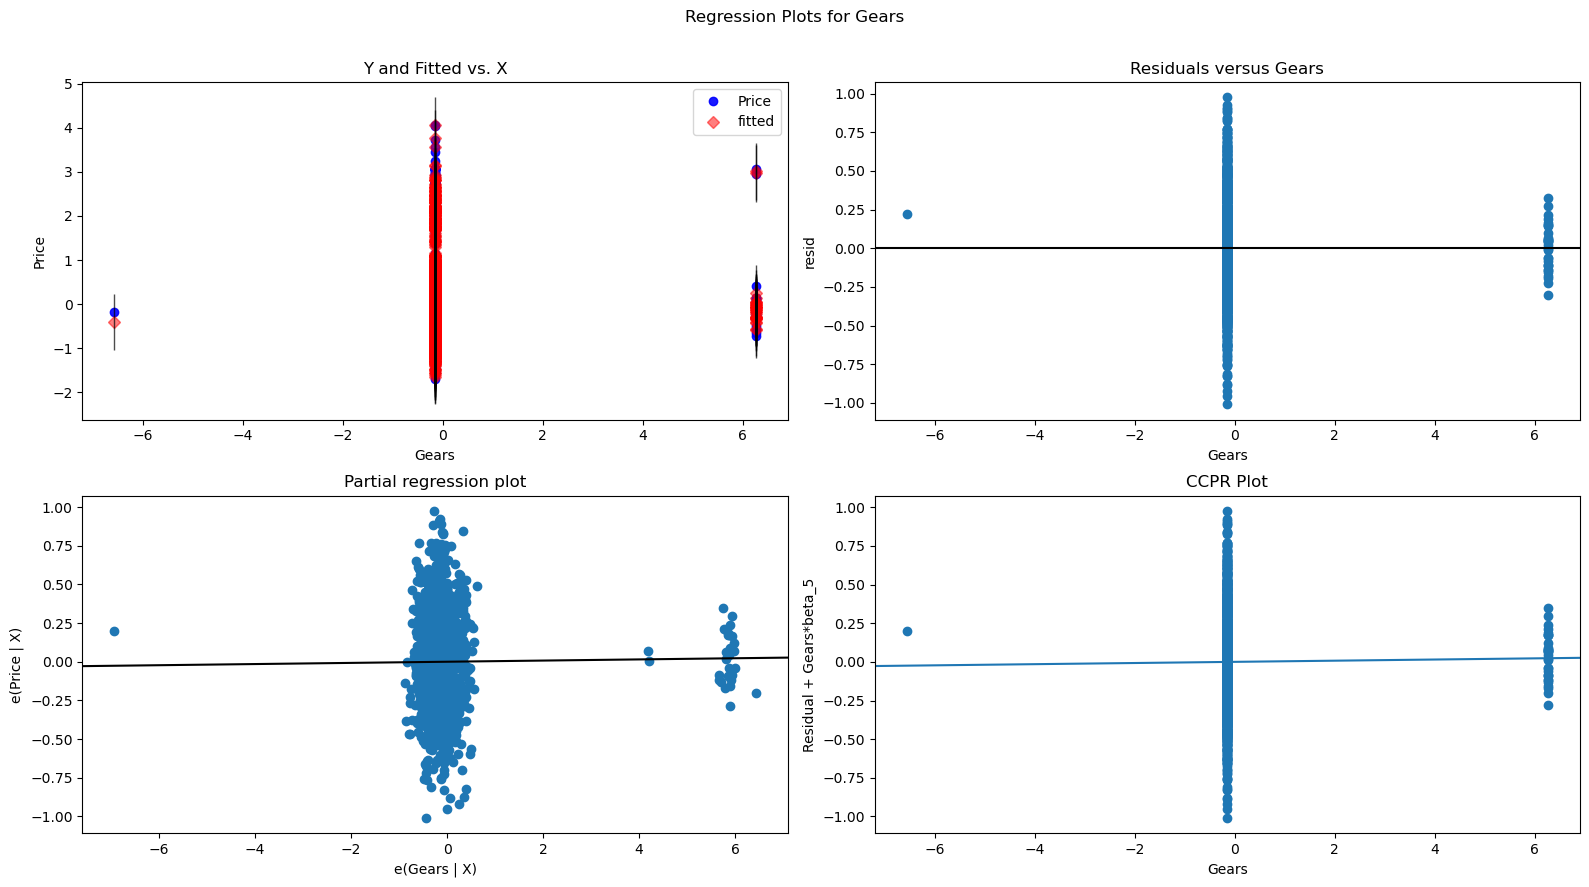

In [73]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

### Let's Try another Test by Calculating VIF ( Variance Inflation Factor )

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7     Weight  3.94
4         CC  2.97
0        Age  2.14
1         KM  1.86
5      Doors  1.36
2         HP  1.26
3  Automatic  1.11
6      Gears  1.09

In [75]:
r_sqr_age = smf.ols('Age~HP+Weight+CC+Doors+Gears+KM+Automatic', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age+CC+Doors+Gears+KM+Automatic', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC~HP+Weight+Age+Doors+Gears+KM+Automatic', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Weight+CC+Doors+Age+Gears+KM+Automatic', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_km = smf.ols('KM~Weight+CC+Doors+Age+Gears+HP+Automatic', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~Weight+CC+Doors+Age+HP+KM+Automatic', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~Weight+CC+HP+Age+Gears+KM+Automatic', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)
r_sqr_automatic = smf.ols('Automatic~Weight+CC+Doors+Age+Gears+KM+HP', dataframe).fit().rsquared
vif_automatic = 1/(1-r_sqr_doors)

In [76]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','Gears','KM','Automatic'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_gears,vif_km,vif_automatic]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

VIF
Variables          
Gears      1.088769
HP         1.263895
Doors      1.360899
Automatic  1.360899
KM         1.863544
Age        2.144592
CC         2.972619
Weight     3.935135

In [77]:

gears_model = smf.ols('Price~Gears', data=df_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06681
Date:                Mon, 22 Apr 2024   Prob (F-statistic):              0.796
Time:                        15:36:00   Log-Likelihood:                -1882.9
No. Observations:                1327   AIC:                             3770.
Df Residuals:                    1325   BIC:                             3780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.235e-16      0.027   2.63e-14      1.000      -0.054       0.054
Gears          0.0071      0.027      0.258      0.796      -0.047       0.061
==============================================================================
Omnibus:                      299.161   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.368
Skew:                           1.358   Prob(JB):                    7.65e-123
Kurtosis:                       4.672   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
weight_model = smf.ols('Price~Weight', data=df_standard_scaled).fit()
weight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     645.6
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          2.38e-116
Time:                        15:36:00   Log-Likelihood:                -1619.6
No. Observations:                1327   AIC:                             3243.
Df Residuals:                    1325   BIC:                             3254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.235e-16      0.023   3.21e-14      1.000      -0.044       0.044
Weight         0.5724      0.023     25.409      0.000       0.528       0.617
==============================================================================
Omnibus:                       43.590   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.008
Skew:                           0.392   Prob(JB):                     8.39e-12
Kurtosis:                       3.554   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
gears_weight_model = smf.ols('Price~Gears+Weight', data=df_standard_scaled).fit()
gears_weight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     322.6
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          7.54e-115
Time:                        15:36:00   Log-Likelihood:                -1619.6
No. Observations:                1327   AIC:                             3245.
Df Residuals:                    1324   BIC:                             3261.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.235e-16      0.023   3.21e-14      1.000      -0.044       0.044
Gears         -0.0023      0.023     -0.103      0.918      -0.047       0.042
Weight         0.5724      0.023     25.398      0.000       0.528       0.617
==============================================================================
Omnibus:                       43.431   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.823
Skew:                           0.391   Prob(JB):                     9.20e-12
Kurtosis:                       3.553   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 1

In [80]:
# Dropping highly correlated variables and insignificant variables

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)

In [81]:
x.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight'], dtype='object')

In [82]:
y.columns

Index(['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight'], dtype='object')

In [83]:
model_1 = smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1704.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:00   Log-Likelihood:                -352.22
No. Observations:                1327   AIC:                             720.4
Df Residuals:                    1319   BIC:                             762.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.529e-15      0.009  -2.91e-13      1.000      -0.017       0.017
Age           -0.6428      0.013    -50.567      0.000      -0.668      -0.618
KM            -0.1713      0.012    -14.475      0.000      -0.195      -0.148
HP             0.0846      0.010      8.859      0.000       0.066       0.103
Automatic      0.0019      0.009      0.207      0.836      -0.016       0.020
CC            -0.1622      0.015    -10.868      0.000      -0.192      -0.133
Doors         -0.0459      0.010     -4.645      0.000      -0.065      -0.027
Weight         0.4087      0.017     23.890      0.000       0.375       0.442
==============================================================================
Omnibus:                        5.190   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.109
Skew:                           0.150   Prob(JB):                       0.0777
Kurtosis:                       3.051   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ^Observation: As our Multicollinearity problem has been solved
## Feature Selection Techniques in Machine Learning
### Correlation Coefficient

In [84]:
data.corr()

Price       Age        KM        HP  Automatic        CC  \
Price      1.000000 -0.876273 -0.569420  0.314134   0.033928  0.124375   
Age       -0.876273  1.000000  0.504575 -0.155293   0.031354 -0.096549   
KM        -0.569420  0.504575  1.000000 -0.332904  -0.082168  0.103822   
HP         0.314134 -0.155293 -0.332904  1.000000   0.013313  0.035207   
Automatic  0.033928  0.031354 -0.082168  0.013313   1.000000  0.066934   
CC         0.124375 -0.096549  0.103822  0.035207   0.066934  1.000000   
Doors      0.183604 -0.146929 -0.035193  0.091803  -0.027492  0.079254   
Gears      0.063831 -0.005629  0.014890  0.209642  -0.098582  0.014732   
Weight     0.575869 -0.466484 -0.023969  0.087143   0.058499  0.335077   

              Doors     Gears    Weight  
Price      0.183604  0.063831  0.575869  
Age       -0.146929 -0.005629 -0.466484  
KM        -0.035193  0.014890 -0.023969  
HP         0.091803  0.209642  0.087143  
Automatic -0.027492 -0.098582  0.058499  
CC         0.079254  0.014732  0.335077  
Doors      1.000000 -0.160101  0.301734  
Gears     -0.160101  1.000000  0.021238  
Weight     0.301734  0.021238  1.000000

<Axes: >

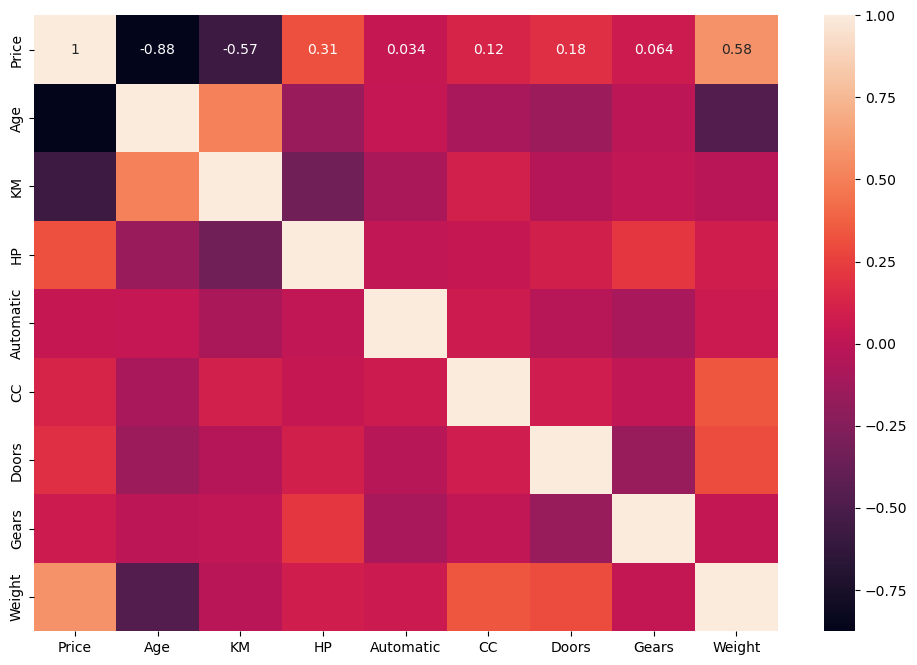

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(
    data.corr(),
    annot=True)

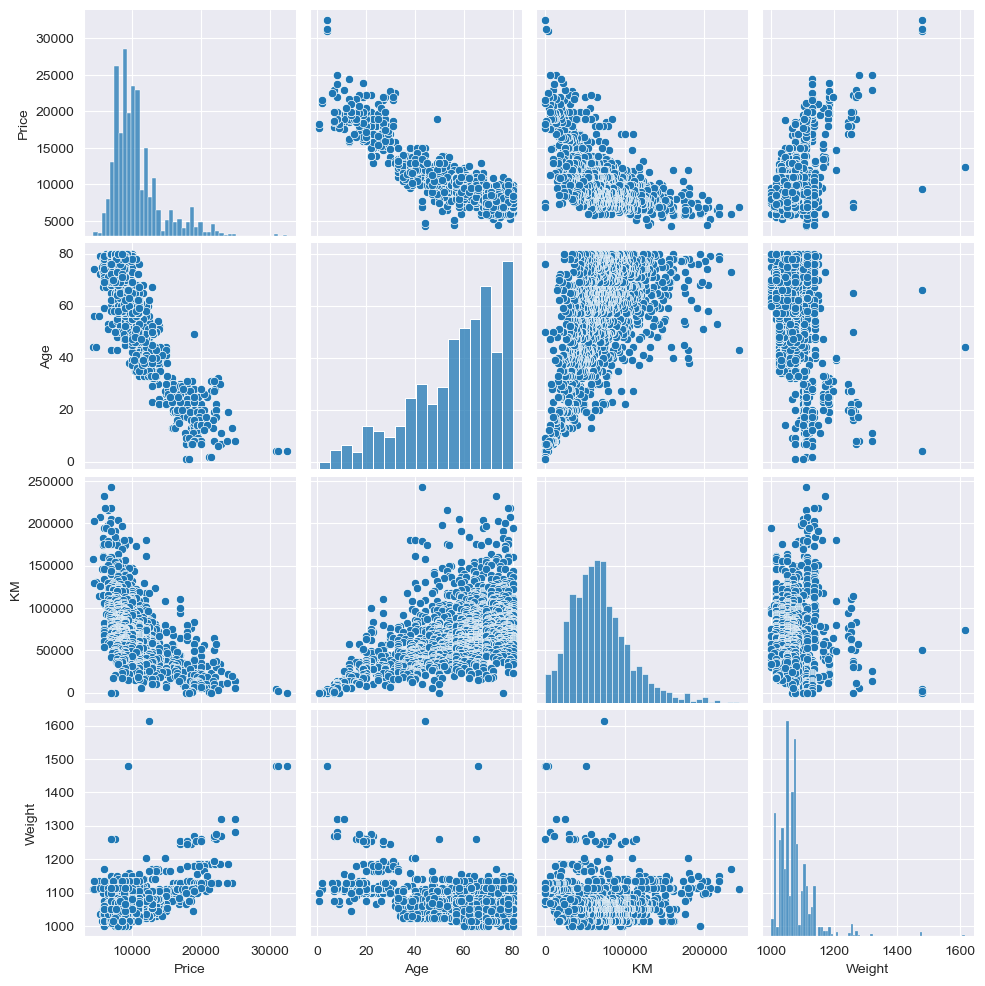

In [86]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature])

## ^Observation: Age and KM has the highest score of correlation with Price but a negative correlation

QT and Weight also have a collinearity among themselves which will affect our model.

KM and Age also have a collinearity among themselves which will affect our model.

# PCA

In [87]:
df_standard_scaled.head()

Price       Age        KM        HP  Automatic        CC     Doors  \
0  1.447122 -1.738537 -0.576057 -0.900059  -0.226948  2.544908 -1.073349   
1  2.079907 -1.682414  0.762833 -0.900059  -0.226948  2.544908 -1.073349   
2  2.631566 -1.514046  0.225031 -0.900059  -0.226948  2.544908 -1.073349   
3  0.798111 -1.906905  0.088562 -2.553231  -0.226948  1.976023 -1.073349   
4  3.069648 -1.963028 -0.702156  7.129637  -0.226948  1.407137 -1.073349   

      Gears    Weight  
0 -0.149792  2.428821  
1 -0.149792  4.395022  
2 -0.149792  4.395022  
3 -0.149792  0.954170  
4  6.262258  2.920371

In [88]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]

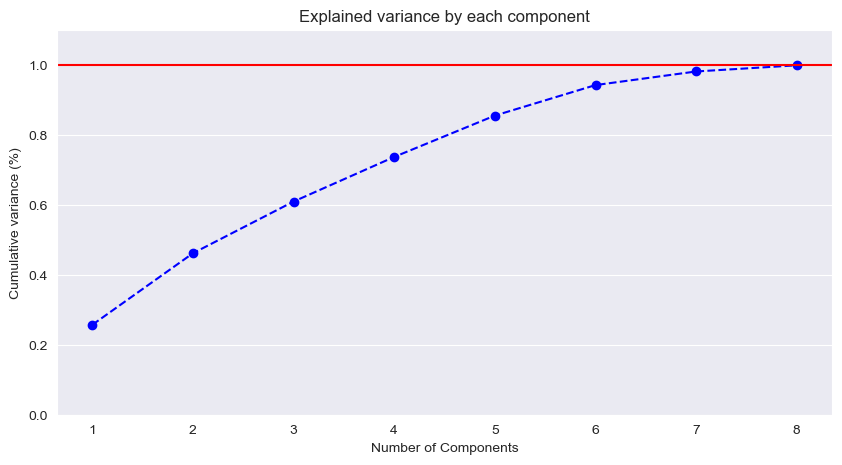

In [89]:
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [90]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.25855627, 0.20450303, 0.14770862, 0.12749102, 0.11811077,
       0.0871754 , 0.03887763, 0.01757726])

Text(0.5, 1.0, 'Explained variance by each component')

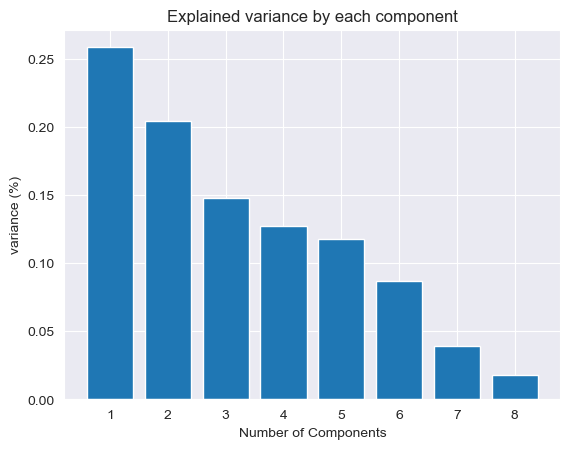

In [91]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [92]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 25.86,  46.31,  61.08,  73.83,  85.64,  94.36,  98.25, 100.01])

In [93]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(1327, 8)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.025591  0.756977  0.069011  0.591045  2.421504  1.218869 -0.575157   
1  4.064046  2.090991  0.038792  0.835699  2.566281  1.047506  0.169525   
2  4.060259  1.784756  0.037541  0.863837  2.540240  1.080062 -0.299426   
3  1.520940  1.119241 -0.753848  0.242595  3.271797  0.408334 -0.175882   
4  4.271947 -2.192722  8.593032  1.534243 -1.490388  0.155530  1.573560   

        PC8  
0 -0.069056  
1  1.393167  
2  1.429750  
3 -1.053008  
4  1.460506

In [94]:
dataframe.Price

0       14950
1       16900
2       18600
3       12950
4       19950
        ...  
1322     8950
1323     8450
1324     7500
1325     8500
1326     7250
Name: Price, Length: 1327, dtype: int64

In [95]:
pca_std_df['Price'] = y
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.025591  0.756977  0.069011  0.591045  2.421504  1.218869 -0.575157   
1  4.064046  2.090991  0.038792  0.835699  2.566281  1.047506  0.169525   
2  4.060259  1.784756  0.037541  0.863837  2.540240  1.080062 -0.299426   
3  1.520940  1.119241 -0.753848  0.242595  3.271797  0.408334 -0.175882   
4  4.271947 -2.192722  8.593032  1.534243 -1.490388  0.155530  1.573560   

        PC8     Price  
0 -0.069056 -1.738537  
1  1.393167 -1.682414  
2  1.429750 -1.514046  
3 -1.053008 -1.906905  
4  1.460506 -1.963028

In [96]:
import statsmodels.formula.api as sm
pca_model= sm.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.241e+31
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:05   Log-Likelihood:                 42871.
No. Observations:                1327   AIC:                        -8.572e+04
Df Residuals:                    1318   BIC:                        -8.568e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.916e-15   6.21e-17    -30.853      0.000   -2.04e-15   -1.79e-15
PC1           -0.4406   4.32e-17  -1.02e+16      0.000      -0.441      -0.441
PC2            0.4199   4.86e-17   8.65e+15      0.000       0.420       0.420
PC3            0.0683   5.71e-17    1.2e+15      0.000       0.068       0.068
PC4            0.0382   6.15e-17   6.21e+14      0.000       0.038       0.038
PC5           -0.4435   6.39e-17  -6.94e+15      0.000      -0.444      -0.444
PC6            0.0095   7.44e-17   1.27e+14      0.000       0.009       0.009
PC7           -0.5787   1.11e-16   -5.2e+15      0.000      -0.579      -0.579
PC8            0.3030   1.66e-16   1.83e+15      0.000       0.303       0.303
==============================================================================
Omnibus:                      521.284   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1897.725
Skew:                          -1.933   Prob(JB):                         0.00
Kurtosis:                       7.403   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  1.0
R2_Adjusted_score :  1.0
RMSE :  6018.5175863007735


In [98]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.025591  0.756977  0.069011  0.591045  2.421504  1.218869 -0.575157   
1  4.064046  2.090991  0.038792  0.835699  2.566281  1.047506  0.169525   
2  4.060259  1.784756  0.037541  0.863837  2.540240  1.080062 -0.299426   
3  1.520940  1.119241 -0.753848  0.242595  3.271797  0.408334 -0.175882   
4  4.271947 -2.192722  8.593032  1.534243 -1.490388  0.155530  1.573560   

        PC8  Price  
0 -0.069056  14950  
1  1.393167  16900  
2  1.429750  18600  
3 -1.053008  12950  
4  1.460506  19950

In [99]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((928, 8), (399, 8), (928,), (399,))

In [100]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1)) 
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

LinearRegression()

In [101]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9016807054898959
R2_score (train):  0.9064306780723148
R2_score (test):  0.8850677334692567
RMSE using all features:  1033.3571033232588


# Forward Selection

In [102]:
X = dataframe.drop('Price', axis =1)
Y = dataframe[['Price']]

In [103]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [104]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((928, 8), (399, 8), (928, 1), (399, 1))

In [106]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# step forward feature selection
# !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(x_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.9s finished

[2024-04-22 15:36:08] Features: 1/4 -- score: 0.858128990947509[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.1s finished

[2024-04-22 15:36:12] Features: 2/4 -- score: 0.8742032758288878[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.2s finished

[2024-04-22 15:36:15] Features: 3/4 -- score: 0.900450829416409[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [107]:
sfs1.k_feature_idx_

(0, 1, 2, 7)

In [108]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['Age', 'KM', 'HP', 'Weight'], dtype='object')

#### Observation: For the above case we can say these 4 features are enough to get a higher R-squared value

### Regularization

In [109]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'Price ~ Age + KM + HP + CC + Doors + Weight + Automatic + Gears'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

         coef         err    varname
0 -111.212607    4.317999        Age
1   -0.015192    0.002060         KM
2   20.319396    4.649707         HP
3   -2.834909    0.515307         CC
4 -145.098504   64.283027      Doors
5   30.885012    2.561468     Weight
6   32.218105  256.557486  Automatic
7   78.291061  351.508542      Gears


<Axes: title={'center': 'Modal Coefficients'}, xlabel='varname'>

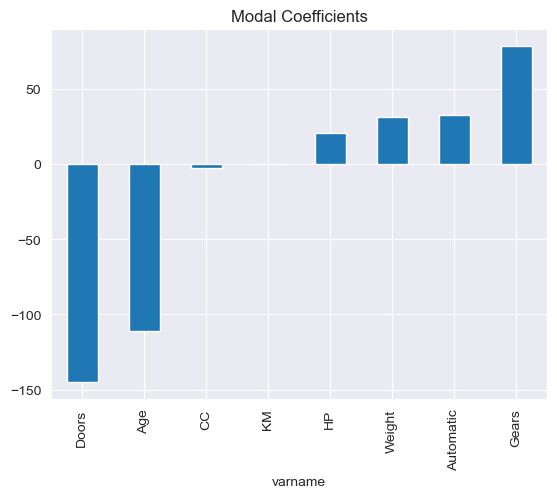

In [110]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

We can see that coefficients of Gears(last 1) is much higher as compared to rest of the coefficients. Therefore the total Price would be more driven by this feature.

How can we reduce the magnitude of coefficients in our model? For this purpose, we have different types of regression techniques which uses regularization to overcome this problem. So let us discuss them.

### Ridge Regression 
Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.

In [111]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, solver = "auto")

ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05)

In [112]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.9016813920753586
R2_score (train):  0.9064306779814457
R2_score (test):  0.8850676466777027
RMSE:  1033.3574934950304


In [113]:
ridgeReg.coef_.flatten()

array([-1.13419191e+02, -1.53151201e-02,  1.90236466e+01,  6.82364908e+01,
       -2.64939267e+00, -1.13606585e+02,  5.60987943e+01,  2.96766815e+01])

In [114]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

         coef    varname
0 -113.419191        Age
1   -0.015315         KM
2   19.023647         HP
3   68.236491  Automatic
4   -2.649393         CC
5 -113.606585      Doors
6   56.098794      Gears
7   29.676681     Weight


<Axes: title={'center': 'alpha = 0.01'}, xlabel='varname'>

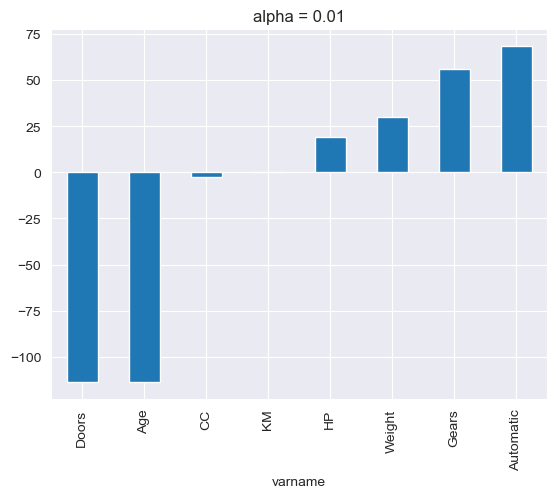

In [115]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.01')

<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

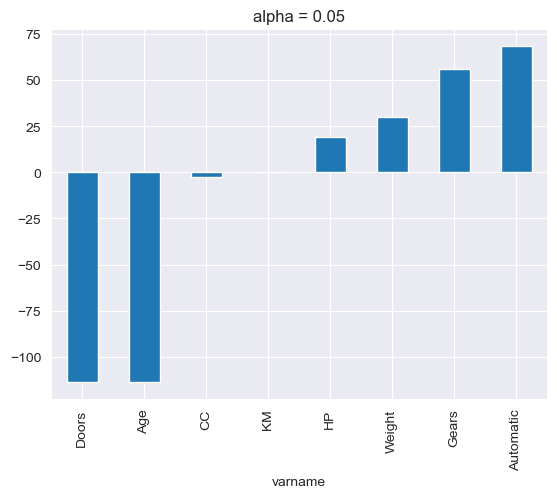

In [116]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

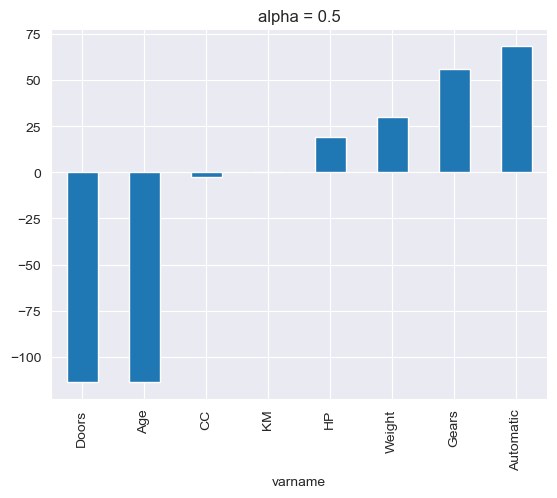

In [117]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

<Axes: title={'center': 'alpha = 5'}, xlabel='varname'>

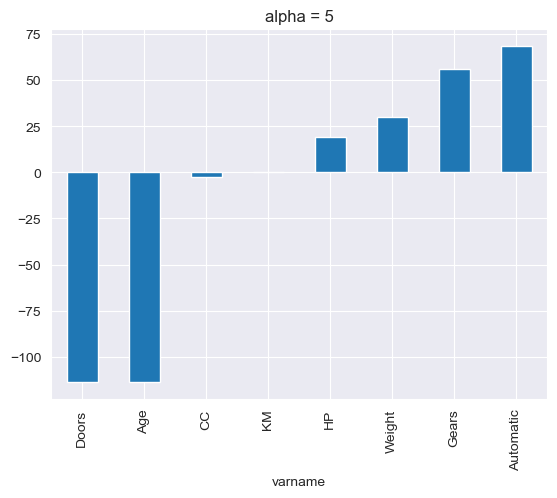

In [118]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5')

<Axes: title={'center': 'alpha = 10'}, xlabel='varname'>

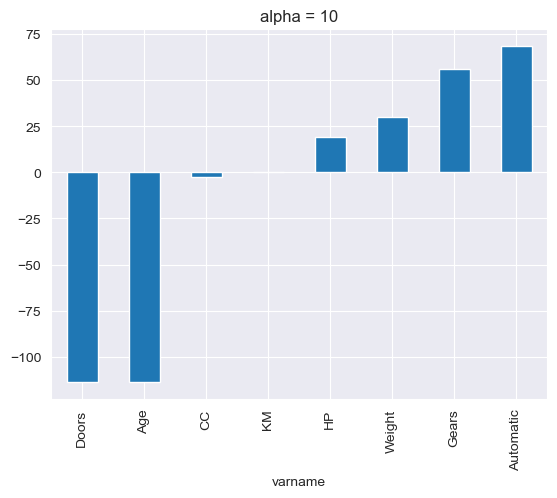

In [119]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 10')

You can see that, as we increase the value of alpha, the magnitude of the coefficients decreases.

But if you calculate R-square for each alpha, we will see that the value of R-square will be maximum at alpha=0.05. So we have to choose it wisely by iterating it through a range of values and using the one which gives us lowest error.

In [120]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [121]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = x_train, y = y_train.values.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.894777615580772
R2_score (train):  0.9206263201575167
R2_score (test):  0.8981020121572019
RMSE:  972.9986721629243


In [122]:
# here, again I will train a Ridge Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Ridge"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)

sel_ridge.get_support()

# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_ridge.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(x_train.columns[(sel_ridge.get_support())])

total features: 8
selected features: 4
Index(['Age', 'Automatic', 'Doors', 'Gears'], dtype='object')


### LASSO Regression

In [126]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

In [127]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.9017209716191967
R2_score (train):  0.9064285820505916
R2_score (test):  0.8850574359728847
RMSE:  1033.4033947303906


In [128]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

         coef    varname
0 -113.362397        Age
1   -0.015320         KM
2   19.071809         HP
3   51.506341  Automatic
4   -2.655385         CC
5 -114.253723      Doors
6   32.303809      Gears
7   29.716752     Weight


<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

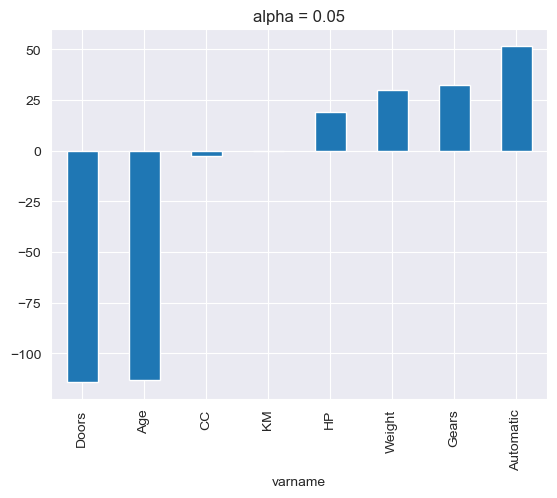

In [129]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

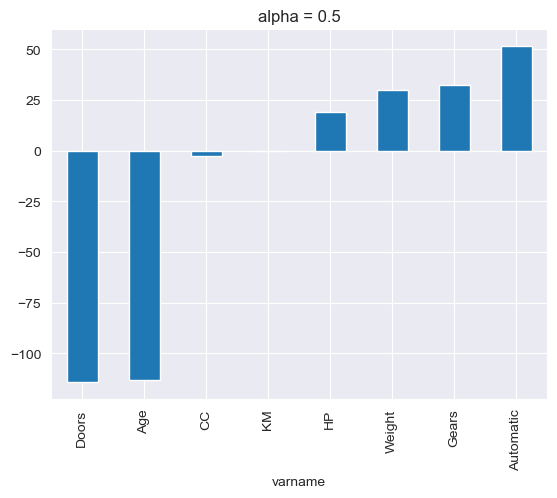

In [130]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

In [131]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [132]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.908991435818662
R2_score (train):  0.9204329904050329
R2_score (test):  0.898283180845747
RMSE:  972.1333198661382


In [133]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [134]:
sel_lasso.get_support()

array([ True,  True,  True, False,  True, False, False,  True])

In [135]:
# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))

total features: 8
selected features: 5
features with coefficients shrank to zero: 3


In [139]:
x_train.columns[(sel_lasso.get_support())]

Index(['Age', 'KM', 'HP', 'CC', 'Weight'], dtype='object')

#### Let's compare the residuals of all the models to come up with an conclusion
### Model Validation
#### Comparing different models with respect to their Root Mean Squared Errors
#### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [141]:
x = dataframe[['Age','KM','HP','CC','Doors','Automatic','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','Automatic','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model_1.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  0.9004433815867413
R2_Adjusted_score :  0.8999150295557384
RMSE :  972.3289544810649


In [152]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age','Weight','KM','HP','CC','Automatic','Doors','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age','Weight','KM','HP','CC','Automatic','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['Age','Weight','KM','HP','Automatic','CC','Doors','Gears']]))

In [153]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [154]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

Raw Model= 978.7394908519448 
After Removing Influencers= 975.5724388445211 
After Log Transformation on both Model= 1853.4906994289754 
After Cube-root Transformation on both Model= 1187.3456918604916 
After Sqaure Root Transformation on both Model= 1020.3637763732852 
After Removing Influencers from model 975.5724388445211 
Final Model without Multicollinearity Model= 972.3289544810649


#### Let's compare the Root Mean Squared Error and check for the minimum value

In [155]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'Final Model without Multicollinearity Model'

### ^Observation: The Model that was build without Multicollinearity Issue and using Standard Scaler Transformation performed very well.
Scoring minimumn Root mean squared error and a good R-squared and adjusted R-squared

In [158]:
Final_model = smf.ols("Price~Age+KM+HP+CC+Doors+Automatic+Weight", data = df_standard_scaled).fit()
# Finding rsquared values
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1704.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:10:26   Log-Likelihood:                -352.22
No. Observations:                1327   AIC:                             720.4
Df Residuals:                    1319   BIC:                             762.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.529e-15      0.009  -2.91e-13      1.000      -0.017       0.017
Age           -0.6428      0.013    -50.567      0.000      -0.668      -0.618
KM            -0.1713      0.012    -14.475      0.000      -0.195      -0.148
HP             0.0846      0.010      8.859      0.000       0.066       0.103
CC            -0.1622      0.015    -10.868      0.000      -0.192      -0.133
Doors         -0.0459      0.010     -4.645      0.000      -0.065      -0.027
Automatic      0.0019      0.009      0.207      0.836      -0.016       0.020
Weight         0.4087      0.017     23.890      0.000       0.375       0.442
==============================================================================
Omnibus:                        5.190   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.109
Skew:                           0.150   Prob(JB):                       0.0777
Kurtosis:                       3.051   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residual Analysis
Test for Normality of Residuals (Q-Q Plot)

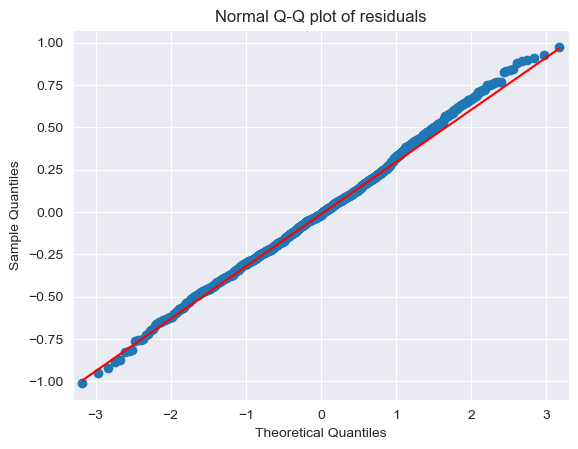

In [161]:
#Residuals values  = y - yhat
from statsmodels.graphics.gofplots import qqplot

qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### ^Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

## Residual Plot for Homoscedasticity

In [163]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

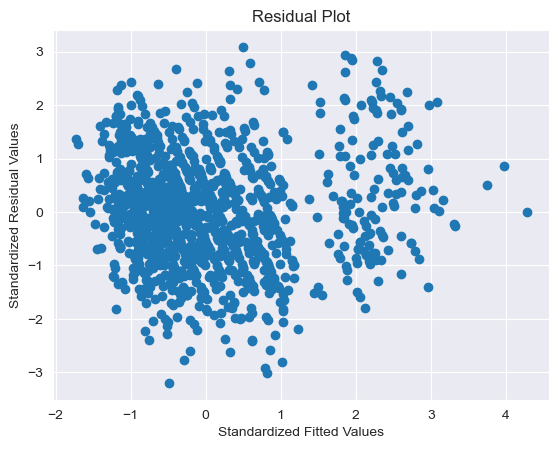

In [164]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### ^Observation: Constant Variance (Homoscedasticity) in Error
#### Residual VS Regressors
##### Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

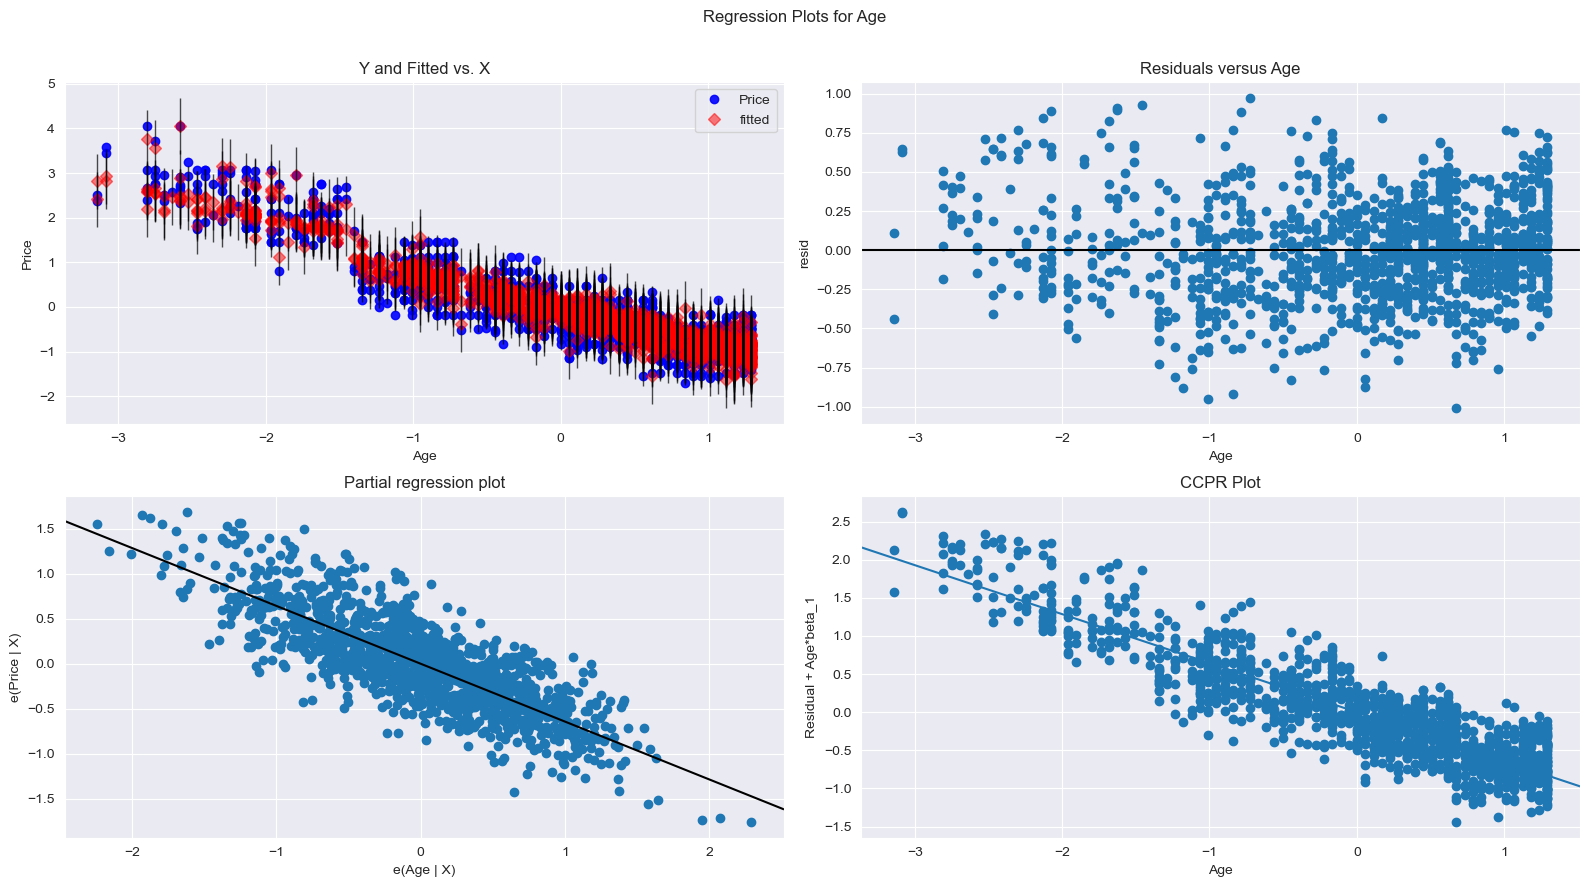

In [166]:
# Assuming Final_model is an OLS regression model
fig = plt.figure(figsize=(16, 9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

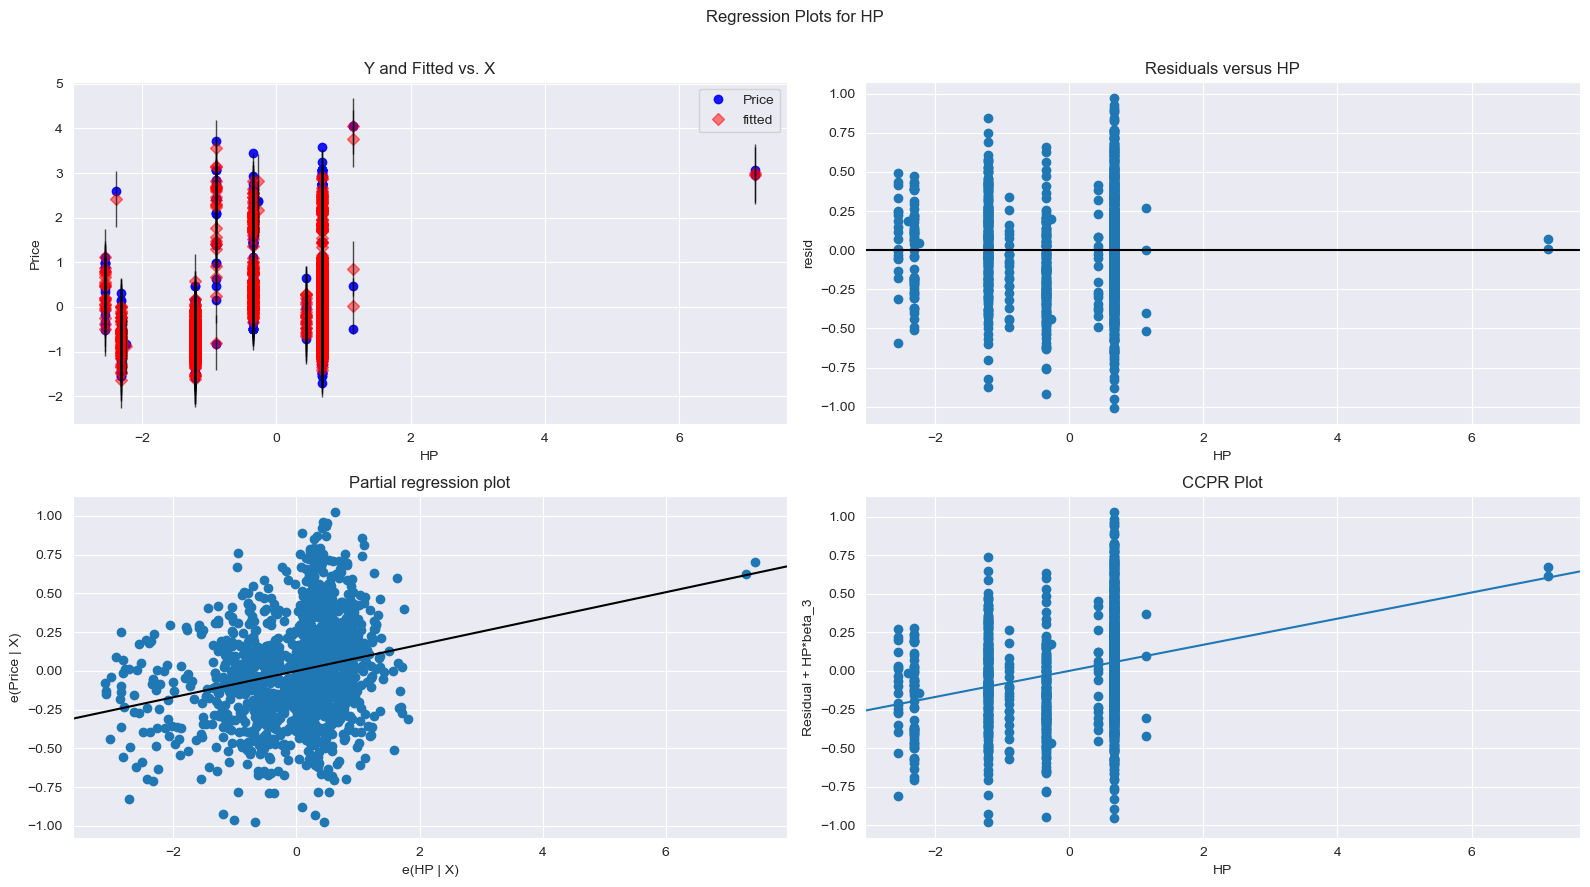

In [167]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

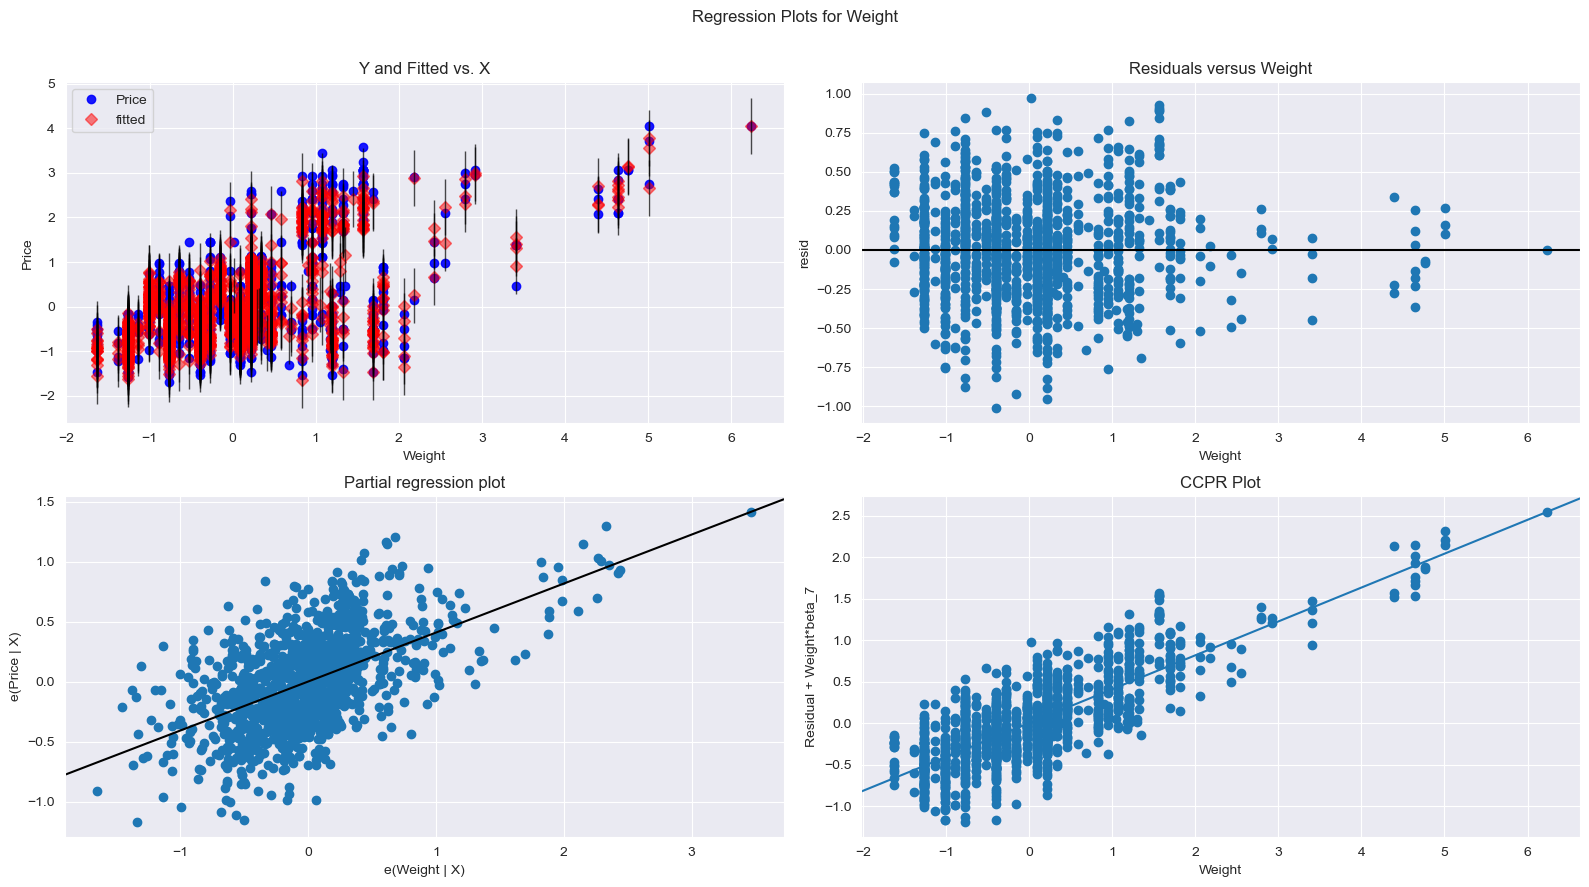

In [168]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

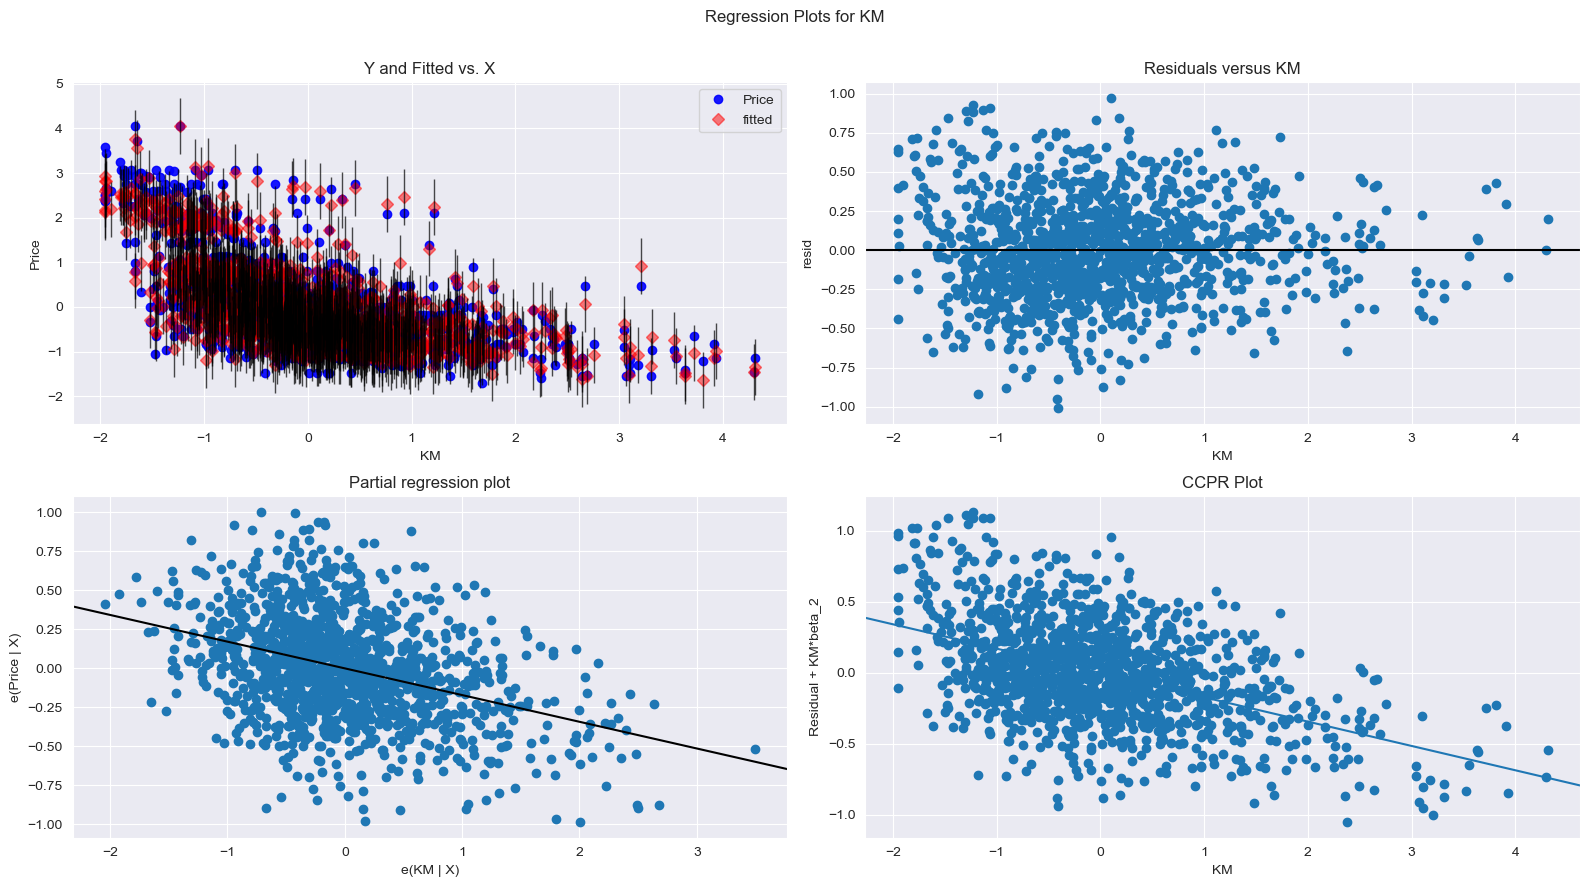

In [169]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

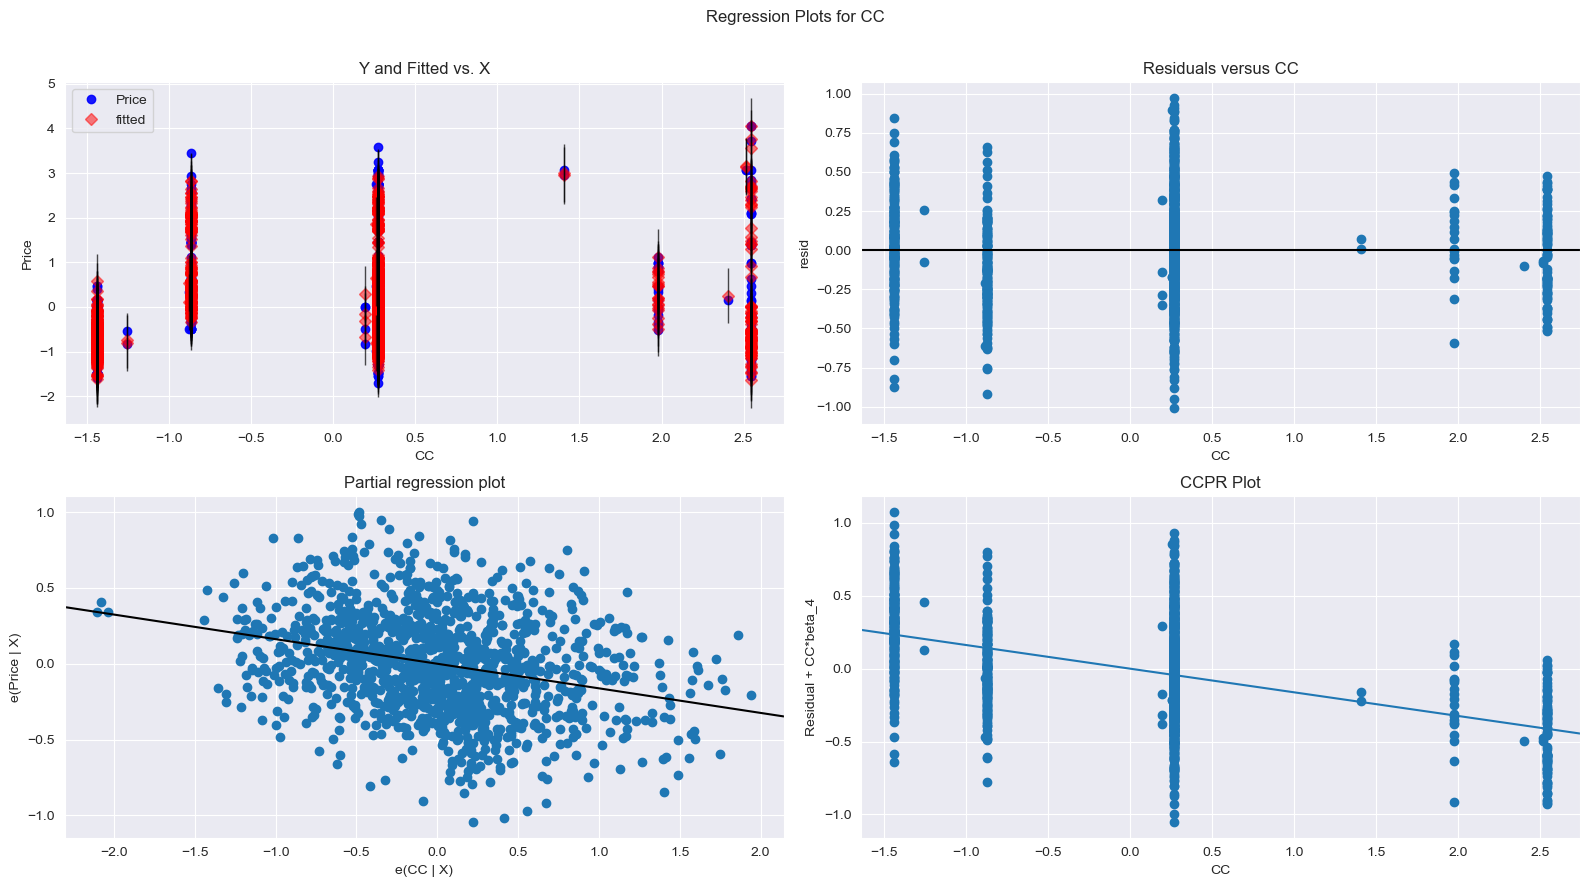

In [170]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

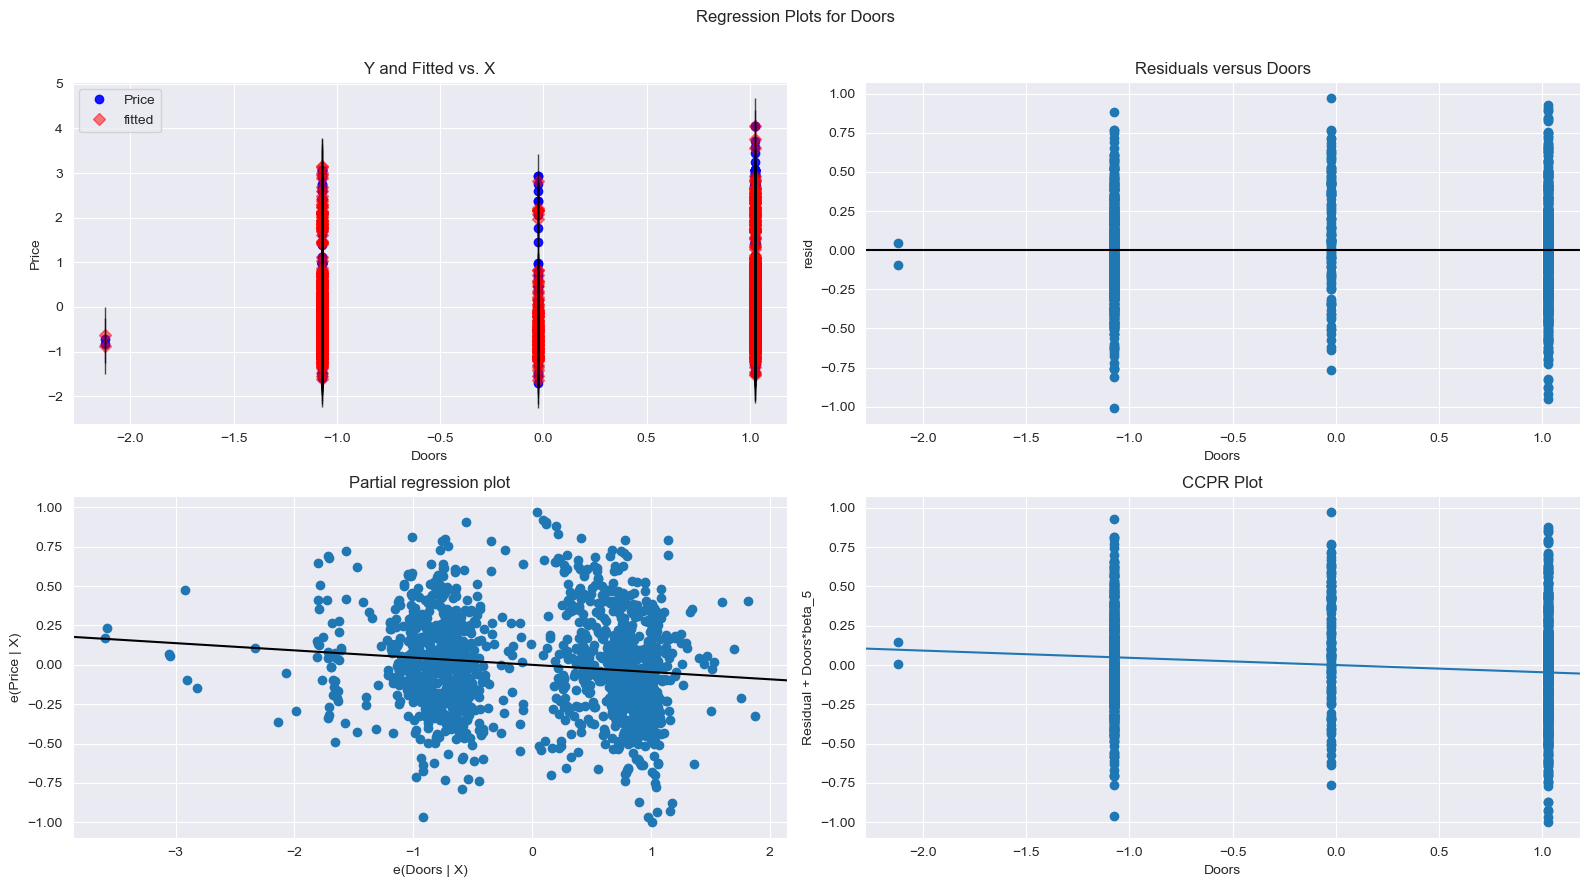

In [171]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

### ^Observation:
Some of the feature doesn't suggest linear relationship with the Dependent feature like Gears, Automatic, CC, Doors, Weight and HP

Only KM and Age is having a linear relation with the Price Feature

In [172]:
x = dataframe[['Age','KM','HP','CC','Doors','Automatic','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','Automatic','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[15940.68788945],
       [17599.11009643],
       [17549.47097352],
       ...,
       [ 9151.85803668],
       [ 8673.46238442],
       [ 8786.15166688]])

In [173]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

972.3289544810649

In [175]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['Automatic'] = dataframe.Automatic
predicted['Doors'] = dataframe.Doors
predicted

Predicted_Price  Price  Age     KM  Weight   HP    CC  Automatic  Doors
0        15940.687889  14950   26  48000    1165   90  2000          0      3
1        17599.110096  16900   27  94612    1245   90  2000          0      3
2        17549.470974  18600   30  75889    1245   90  2000          0      3
3        13919.353096  12950   23  71138    1105   69  1900          0      3
4        19734.383834  19950   22  43610    1185  192  1800          0      3
...               ...    ...  ...    ...     ...  ...   ...        ...    ...
1322      9067.448353   8950   78  24000    1065   86  1300          1      5
1323      7582.174700   8450   80  23000    1015   86  1300          0      3
1324      9151.858037   7500   69  20544    1025   86  1300          0      3
1325      8673.462384   8500   71  17016    1015   86  1300          0      3
1326      8786.151667   7250   70  16916    1015   86  1300          0      3

[1327 rows x 9 columns]

## Preparing a table containing R^2 value for each prepared model

In [176]:
models={'Different_Models':['Raw_data_Model','After_Removing_Influencers','After_Log Transformation_Model','After_Cube-root_Transformation_Model','After_Sqaure_Root_Transformation_Model','Final_Model_without_Multicollinearity_Model'],
        'R_squared':[raw_data_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cbrt_transformed_model.rsquared,sqrt_transformed_model.rsquared,model_1.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_1.rsquared_adj],
       'RMSE':[np.sqrt(raw_data_model.mse_resid),np.sqrt(final_model.mse_resid),log_both_rmse,cube_root_both_rmse,square_root_both_rmse,rmse_linear]}
model_table=pd.DataFrame(models)
model_table

Different_Models  R_squared  R_squared_adjusted  \
0                               Raw_data_Model   0.900274            0.899669   
1                   After_Removing_Influencers   0.900458            0.899854   
2               After_Log Transformation_Model   0.759824            0.758366   
3         After_Cube-root_Transformation_Model   0.854700            0.853818   
4       After_Sqaure_Root_Transformation_Model   0.881517            0.880798   
5  Final_Model_without_Multicollinearity_Model   0.900443            0.899915   

          RMSE  
0   978.739491  
1   975.572439  
2  1853.490699  
3  1187.345692  
4  1020.363776  
5   972.328954

### Visualizing Models Performance

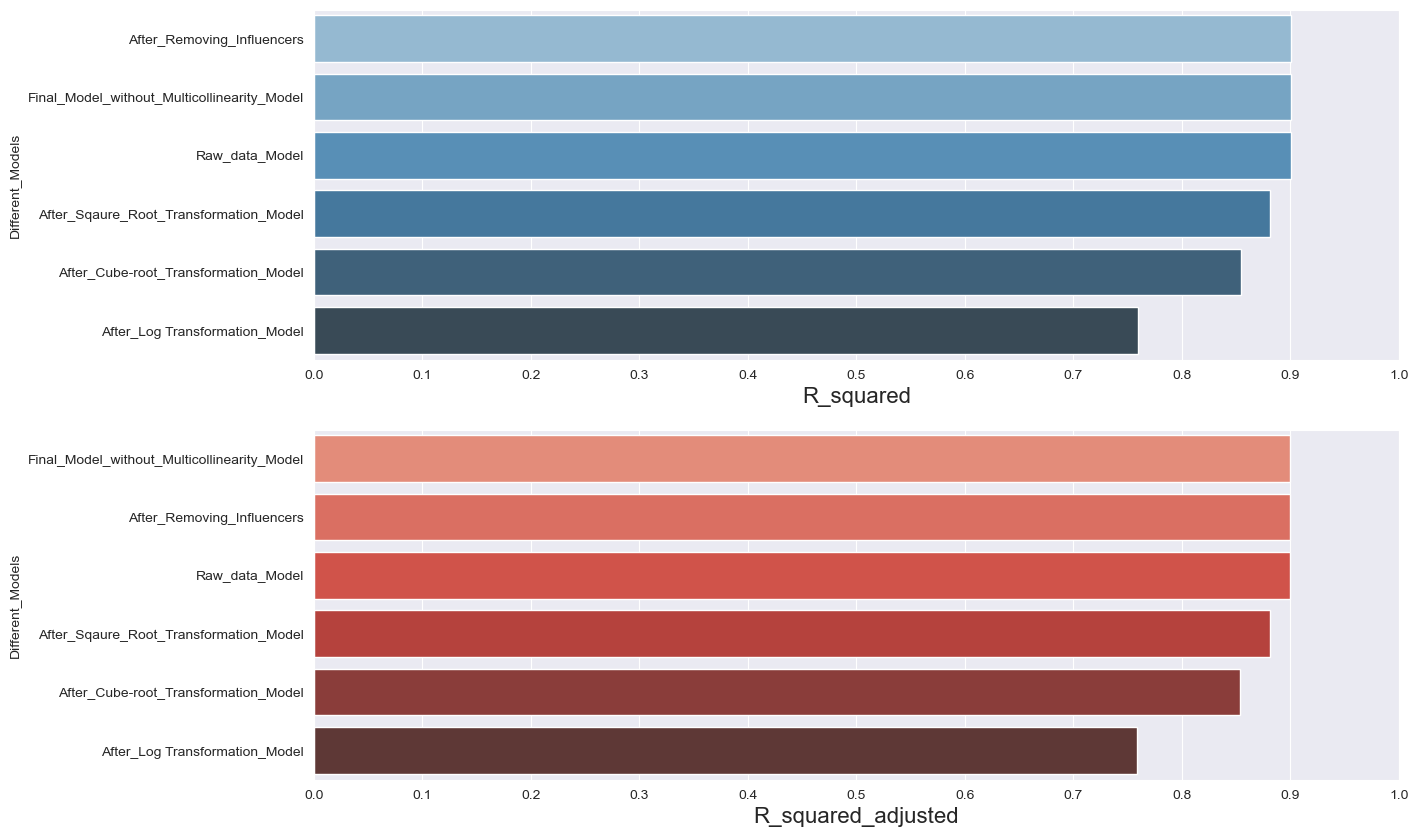

In [177]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

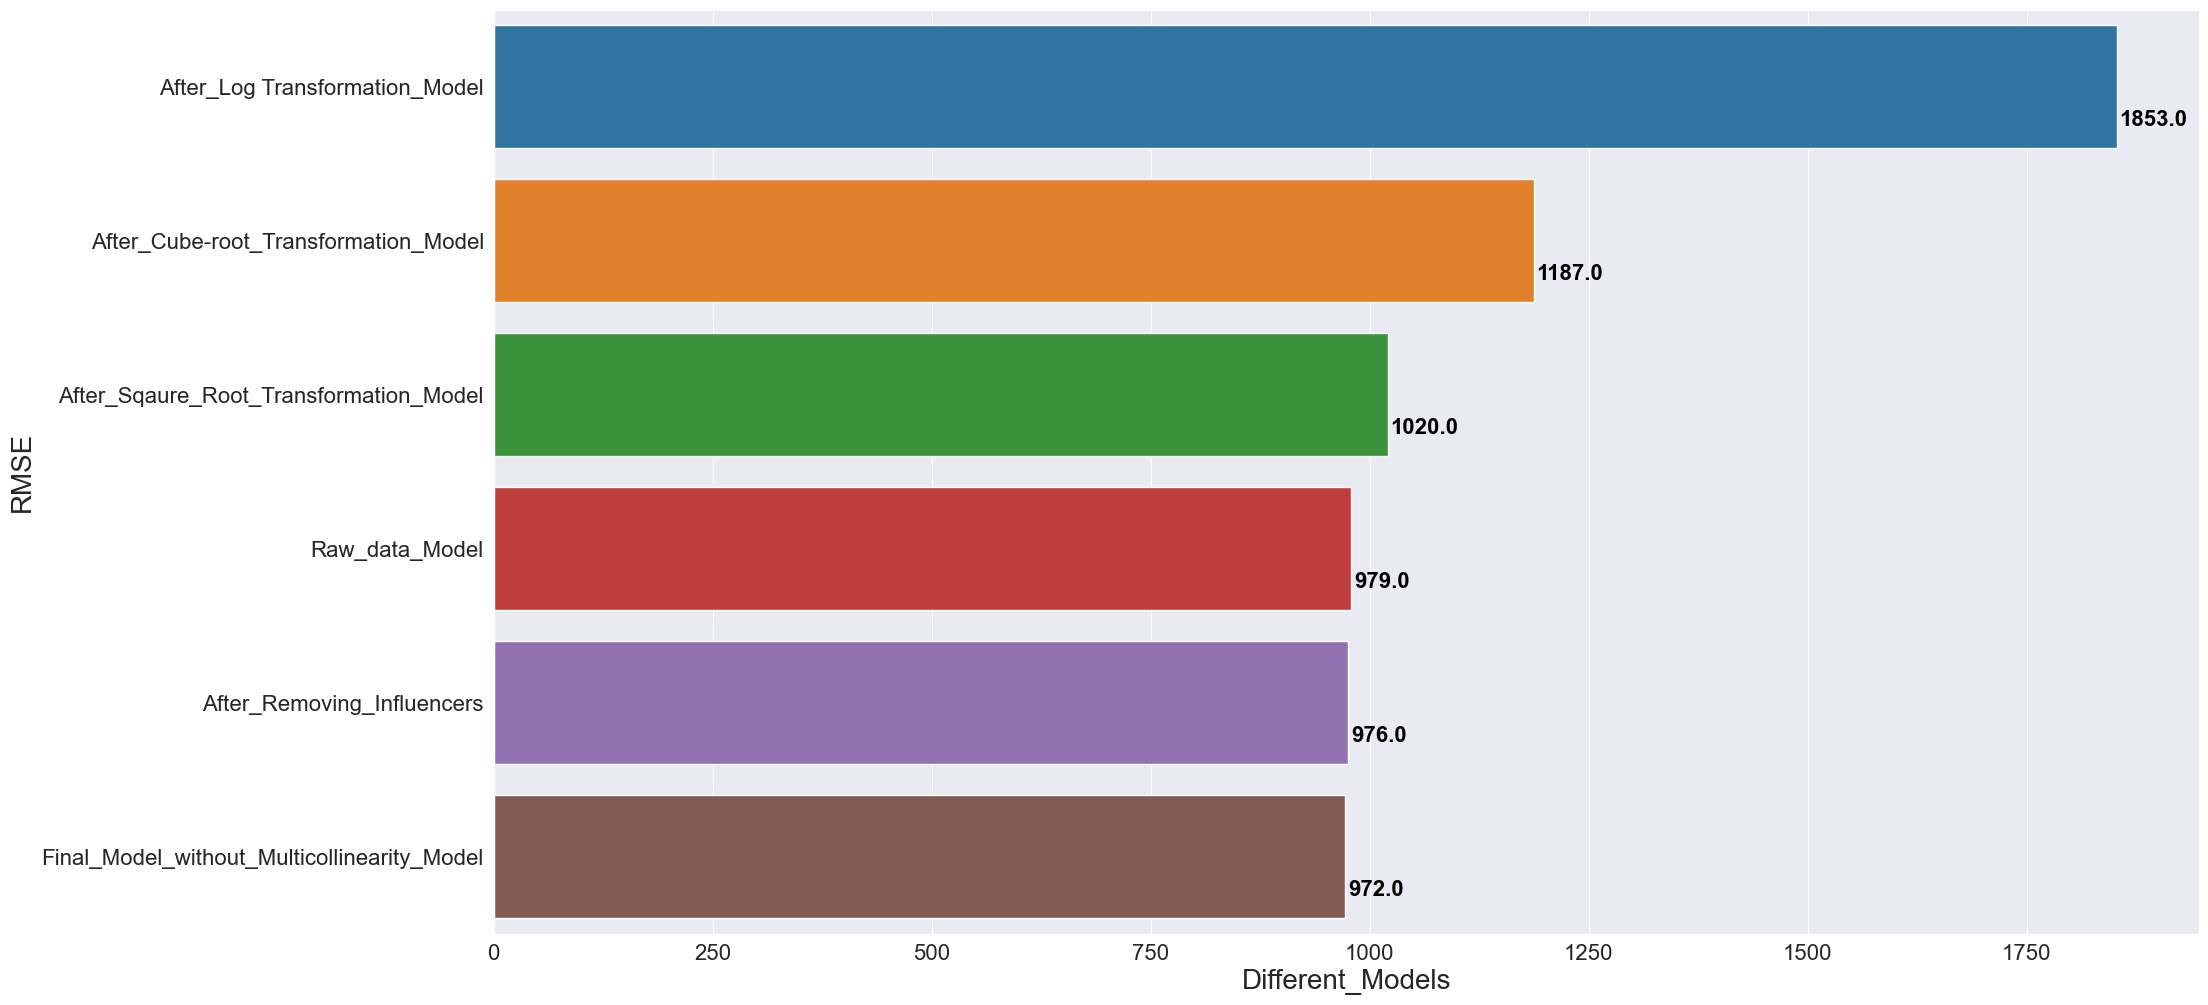

In [178]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(22,12))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=20)
axe.set_ylabel('RMSE', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)



for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

In [179]:
x_train.shape

(928, 8)

In [180]:
#Linear Regression
reg_model = LinearRegression().fit(x_train, y_train)
print(reg_model.score(x_train, y_train),reg_model.score(x_test, y_test))

0.9064306780723147 0.8850677334692568


In [181]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model = GradientBoostingRegressor(random_state=1).fit(x_train, y_train)
print(gd_model.score(x_train, y_train),gd_model.score(x_test, y_test))

0.9469074346604492 0.912375476558858


In [182]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=1).fit(x_train, y_train)
print(rfr_model.score(x_train, y_train),rfr_model.score(x_test, y_test))

0.986981819949368 0.9016381512541148


In [183]:
print('Linear Regression Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, reg_model.predict(x_test))))
print('Gradient Booster Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, gd_model.predict(x_test))))
print('Random Forest Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, rfr_model.predict(x_test))))

Linear Regression Root Mean Squared Error: 1033.3571033232586
Gradient Booster Regressor Root Mean Squared Error: 902.2819677514685
Random Forest Regressor Root Mean Squared Error: 955.9667452278834
